In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import pytz
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Overview of the dataset

In [2]:
df = pd.read_csv('danmus.csv')

In [3]:
#df = pd.read_csv('danmus.csv')
print('Number of records:', df.shape[0])
print('Number of features:', df.shape[1])

Number of records: 7924272
Number of features: 13


In [19]:
df.describe()

,video_id,time,timestamp,font_size,mode,pool
count,7.924272e+06,7.924272e+06,7.924272e+06,7.924272e+06,7.924272e+06,7.924272e+06
mean,8.518506e+06,1.109435e+03,1.484104e+09,2.494517e+01,1.496441e+00,1.717003e-03
std,8.587108e+06,8.488668e+03,3.776824e+07,1.028267e+00,1.295979e+00,4.851661e-02
min,4.442000e+03,-2.147484e+06,1.292258e+09,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.553590e+05,1.274020e+02,1.464625e+09,2.500000e+01,1.000000e+00,0.000000e+00
50%,5.192117e+06,4.698990e+02,1.489236e+09,2.500000e+01,1.000000e+00,0.000000e+00
75%,1.611703e+07,1.304050e+03,1.517479e+09,2.500000e+01,1.000000e+00,0.000000e+00
max,2.627772e+07,4.263100e+06,1.531788e+09,2.550000e+02,1.000000e+01,3.000000e+00


There are 43 negative values in the time column and 41 of them are from video_id 16993288.
Also, there are 16 nan values in the text column and 12647 nan values in the text_trans column. 
43 negative time values and 16 nan text values are dropped.

In [4]:
#df[df.time == -2147483.648]

In [3]:
df = df[df.text.notnull()]
df = df[df.time != -2147483.648]
print('Number of danmus for analysis:', df.shape[0])

Number of danmus for analysis: 7924213


In [5]:
print('Number of unique videos:',len(df.video_id.unique()))
print('Number of unique users:',len(df.user_id_hash.unique()))

Number of unique videos: 4435
Number of unique users: 2097069


In [7]:
def num_danmus(data, vec):
    n = len(vec.unique())
    d = dict.fromkeys(vec.unique())
    num = []
    for i in range(n):
        num.append(len(data[vec==vec.unique()[i]]))
        d[vec.unique()[i]] = num[i]
    
    return d

In [9]:
#print('Number of danmus for each category:')
danmus_cat = pd.DataFrame.from_dict(num_danmus(df, df.category),orient = 'index')
danmus_cat.columns = ['Number of Danmus']
danmus_cat

,Number of Danmus
dance,686128
show,1298966
music,343016
play,578385
sport,902534
tech,690477
bangumi,1797114
movie,1627593


In [10]:
#num_danmus(df, df.video_id)

In [14]:
def num_video(data, vec):
    n = len(vec.unique())
    d = dict.fromkeys(vec.unique())
    num = []
    for i in range(n):
        num.append(len(data[vec==vec.unique()[i]].video_id.unique()))
        d[vec.unique()[i]] = num[i]
    
    return d
    

In [15]:
video_cat = pd.DataFrame.from_dict(num_video(df, df.category),orient = 'index')
video_cat.columns = ['Number of Videos']
video_cat

,Number of Videos
dance,593
show,524
music,564
play,594
sport,555
tech,593
bangumi,786
movie,226


In [16]:
def num_user(data, vec):
    n = len(vec.unique())
    d = dict.fromkeys(vec.unique())
    num = []
    for i in range(n):
        num.append(len(data[vec==vec.unique()[i]].user_id_hash.unique()))
        d[vec.unique()[i]] = num[i]
    
    return d

In [12]:
user_cat = pd.DataFrame.from_dict(num_user(df, df.category),orient = 'index')
user_cat.columns = ['Number of Users']
user_cat

,Number of Users
dance,300109
show,297162
music,151657
play,283802
sport,291164
tech,324072
bangumi,481530
movie,377798


For each category, the number of unique users, danmus and unqiue videos are as follows:

In [19]:
danmus_cat['Number of Users'] = user_cat
danmus_cat['Number of Videos'] = video_cat
danmus_cat['#danmus/#videos'] = danmus_cat['Number of Danmus']/danmus_cat['Number of Videos']
danmus_cat['#danmus/#users'] = danmus_cat['Number of Danmus']/danmus_cat['Number of Users']
danmus_cat

,Number of Danmus,Number of Users,Number of Videos,#danmus/#videos,#danmus/#users
dance,686128,300109,593,1157.045531,2.286263
show,1298966,297162,524,2478.942748,4.371239
music,343016,151657,564,608.184397,2.261788
play,578385,283802,594,973.712121,2.037988
sport,902534,291164,555,1626.187387,3.099744
tech,690477,324072,593,1164.379427,2.130628
bangumi,1797114,481530,786,2286.404580,3.732091
movie,1627593,377798,226,7201.738938,4.308104


In [ ]:
# Distribution of how many Danmus are posted by a user: 1) overall; 2) genre-specific
# Distribution of a user's Danmu posting across different video genres
# Distribution of how many Danmus are posted in a video: 1) overall; 2) genre-specific 
# Within each genre, list the top 10 videos with the most Danmus and sort them according to the descending number of Danmus
# Distribution of the ratio of colorful Danmus in a video: 1) overall; 2) genre-specific
# Distribution of when a colorful Danmu appears in a video (time-location): 1) overall: 2) genre-specific. Only for videos with colorful Danmus


In [532]:
#user_value = df.user_id_hash.value_counts()

In [531]:
#1745380/len(user_value)

In [530]:
#user_value[user_value<5]

## User part

Overall, the distribution of danmus posted by each user has a long tail. 

More than 98% users posted less than 25 danmus. Also, more than 80% users posted less than 5 danmus.

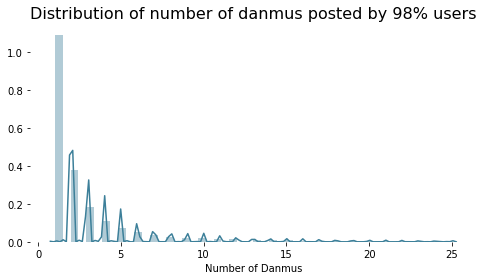

In [131]:
#Users who send less than 25 Danmus
fig= plt.subplots(figsize = (8,4))
sns.distplot(df.user_id_hash.value_counts()[df.user_id_hash.value_counts()<=25],color='#3c7f99')
plt.title('Distribution of number of danmus posted by 98% users',fontsize=16)
plt.xlabel('Number of Danmus')
plt.box(False)
plt.show()

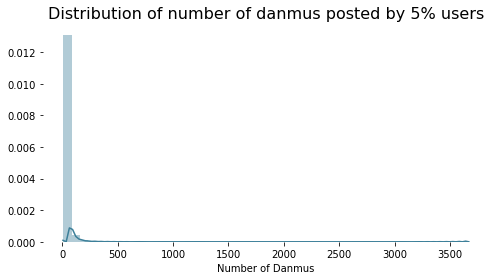

In [25]:
#Users who send more than 12 Danmus
fig= plt.subplots(figsize = (8,4))
sns.distplot(df.user_id_hash.value_counts()[df.user_id_hash.value_counts()>=12],color='#3c7f99')
plt.title('Distribution of number of danmus posted by 5% users',fontsize=16)
plt.xlabel('Number of Danmus')
plt.box(False)
plt.show()

In [11]:
active_danmus = df.user_id_hash.value_counts()[df.user_id_hash.value_counts()>=12]
active_danmus_pd = pd.DataFrame(active_danmus.describe())

In [416]:
active_danmus.shape

(115814,)

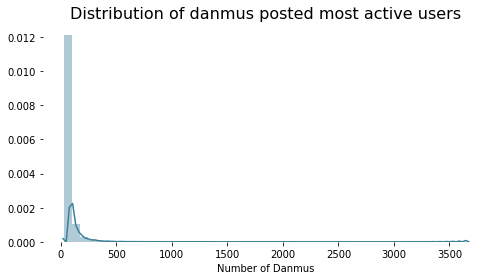

In [369]:
most_active_danmus = df.user_id_hash.value_counts()[df.user_id_hash.value_counts()>=31]
fig= plt.subplots(figsize = (8,4))
sns.distplot(most_active_danmus,color='#3c7f99')
plt.title('Distribution of danmus posted most active users',fontsize=16)
plt.xlabel('Number of Danmus')
plt.box(False)
plt.show()

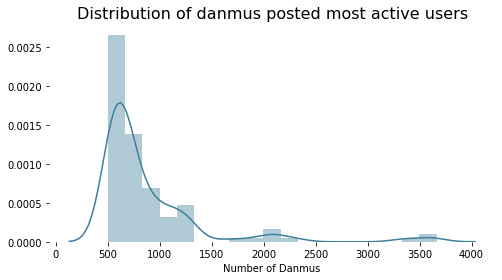

In [373]:
fig= plt.subplots(figsize = (8,4))
sns.distplot(most_active_danmus[most_active_danmus > 500],color='#3c7f99')
plt.title('Distribution of danmus posted most active users',fontsize=16)
plt.xlabel('Number of Danmus')
plt.box(False)
plt.show()

In [12]:
active_danmus_pd = active_danmus_pd.transpose()

In [13]:
active_danmus_pd['mode'] = 12
active_danmus_pd['medium'] = 19
active_danmus_pd[['count','mean','medium','mode','min','25%','50%','75%','max','std']]

,count,mean,medium,mode,min,25%,50%,75%,max,std
user_id_hash,115814.0,29.990372,19,12,12.0,14.0,19.0,31.0,3664.0,45.360761


In [14]:
#danmu_lover = df[df.user_id_hash.value_counts()>=12]
user_id = df.user_id_hash.value_counts()[df.user_id_hash.value_counts()>=12].index
danmu_lover = df[df.user_id_hash.isin(user_id)]

In [15]:
danmu_lover_video = danmu_lover[['user_id_hash','video_id','category']]

danmu_lover_video_1 = danmu_lover_video.groupby(['user_id_hash','video_id']).count().reset_index()
danmu_lover_video_1.columns = ['user_id_hash','video_id','danmus']
love_video = danmu_lover_video_1[['user_id_hash','video_id']]
love_video_num = love_video.groupby('user_id_hash').count().reset_index()
                        

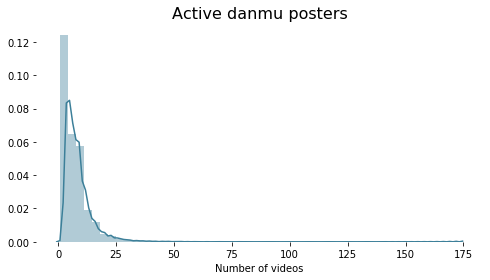

In [41]:
fig= plt.subplots(figsize = (8,4))
sns.distplot(love_video_num['video_id'],color='#3c7f99')
plt.title('Active danmu posters',fontsize=16)
plt.xlabel('Number of videos')
plt.box(False)
plt.show()

In [16]:
love_pd = pd.DataFrame(love_video_num['video_id'].describe())
love_pd_trans = love_pd.transpose()
love_pd_trans['mode'] = 1
love_pd_trans['medium'] = 5
love_pd_trans[['count','mean','medium','mode','min','25%','50%','75%','max','std']]

,count,mean,medium,mode,min,25%,50%,75%,max,std
video_id,115814.0,6.829252,5,1,1.0,2.0,5.0,9.0,173.0,6.203534


In [20]:
danmu_lover_genre = danmu_lover_video.groupby(['user_id_hash','category']).count().reset_index()
danmu_lover_genre_1 = danmu_lover_genre[['user_id_hash','category']]
danmu_lover_genre_1.columns = ['user_id_hash','genre']
love_genre = danmu_lover_genre_1[['user_id_hash','genre']]
love_genre_num = love_genre.groupby('user_id_hash').count().reset_index()
love_genre_num.head()

,user_id_hash,genre
0,0000cd0e,1
1,00023576,1
2,000386b9,1
3,000978f4,1
4,000aefc8,1


In [21]:
love_genre_pd = pd.DataFrame(love_genre_num['genre'].describe())
love_genre_pd_trans = love_genre_pd.transpose()
love_genre_pd_trans['mode'] = 1
love_genre_pd_trans['medium'] = 1
love_genre_pd_trans[['count','mean','medium','mode','min','25%','50%','75%','max','std']]

,count,mean,medium,mode,min,25%,50%,75%,max,std
genre,115814.0,1.816464,1,1,1.0,1.0,1.0,2.0,8.0,1.063007


In [22]:
love_genre_num['genre'][love_genre_num['genre']==8].shape

(27,)

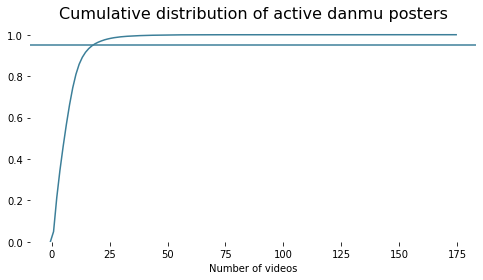

In [43]:
fig= plt.subplots(figsize = (8,4))
sns.kdeplot(love_video_num['video_id'],color='#3c7f99',cumulative = True,legend = False)
plt.title('Cumulative distribution of active danmu posters', fontsize=16)
plt.axhline(0.95,0,175,label = '95%',color='#3c7f99')
plt.xlabel('Number of videos')
plt.box(False)

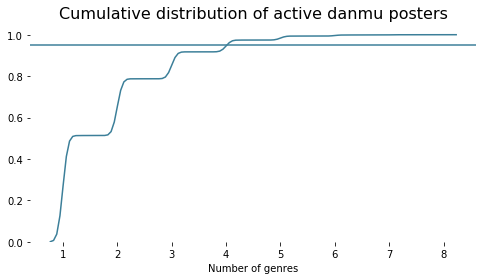

In [50]:
fig= plt.subplots(figsize = (8,4))
sns.kdeplot(love_genre_num['genre'],color='#3c7f99',cumulative = True,legend = False)
plt.title('Cumulative distribution of active danmu posters', fontsize=16)
plt.axhline(0.95,0,8,label = '90%',color='#3c7f99')
plt.xlabel('Number of genres')
plt.box(False)

In [23]:
jsons = []
for line in open('meta.json', 'r'):
    jsons.append(json.loads(line))

video_frames =[]
for i in range(len(jsons)):
    video_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

video_pd = pd.concat(video_frames)

In [24]:
duration_pd = video_pd[['video_id','duration']]

In [25]:
danmu_lover['datetime'] = danmu_lover.timestamp.apply(datetime.fromtimestamp)
lover_time =  danmu_lover[['user_id_hash','video_id','datetime']]
#lover_time[lover_time['user_id_hash'] == 'a29e273b']

In [26]:
lover_merge = lover_time.merge(video_pd, on = 'video_id')
lover_merge.shape

(3473305, 12)

In [405]:
danmu_lover.shape

(3473305, 14)

In [27]:
pd.unique(danmu_lover.user_id_hash).shape

(115814,)

In [404]:
lover_merge.head()

,user_id_hash,video_id,datetime,category,title,desc,duration,pubdate,favorite,coin,view,share
0,a29e273b,6683560,2016-10-15 03:03:59,dance,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724
1,70da6868,6683560,2016-10-15 04:04:00,dance,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724
2,7ed82d51,6683560,2016-10-15 04:04:02,dance,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724
3,70da6868,6683560,2016-10-15 04:04:03,dance,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724
4,b08f5035,6683560,2016-10-15 04:04:08,dance,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724


In [399]:
lover_merge_pd = lover_merge[['user_id_hash','video_id','datetime']]
lover_merge_pd.shape

(3473305, 3)

In [400]:
lover_min = lover_merge_pd.groupby(['user_id_hash','video_id']).min().reset_index()
lover_max = lover_merge_pd.groupby(['user_id_hash','video_id']).max().reset_index()

In [401]:
lover_max.shape

(790923, 3)

In [402]:
lover_dur = lover_max.datetime - lover_min.datetime
for i in range(lover_dur.shape[0]):
    lover_dur[i] = lover_dur[i].total_seconds()
lover_max['gap'] = lover_dur
lover_all = lover_max.merge(duration_pd,on = 'video_id')
lover_final = lover_all[['user_id_hash','video_id','gap','duration']]
lover_final.head()

,user_id_hash,video_id,gap,duration
0,0000cd0e,4442,1431,1379
1,00a18ef1,4442,0,1379
2,01960e75,4442,0,1379
3,01e506f3,4442,0,1379
4,04c71c2d,4442,937,1379


In [407]:
lover_final.shape

(790923, 4)

In [403]:
#Assumption: the 
minus = lover_final.gap - lover_final.duration
multi_index = lover_final[minus > lover_final.duration].index
many_time = lover_final[lover_final.index.isin(multi_index)]
print('Active users who watch many times:', many_time.shape[0])
print('Active users who watch one time:', lover_final.shape[0] - many_time.shape[0])

Active users who watch many times: 85287
Active users who watch one time: 705636


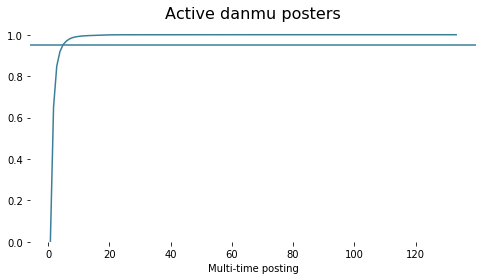

In [419]:
fig= plt.subplots(figsize = (8,4))
sns.kdeplot(many_time.user_id_hash.value_counts(),cumulative = True,color='#3c7f99',legend = False)
plt.title('Active danmu posters',fontsize=16)
plt.axhline(0.95,0,8,label = '90%',color='#3c7f99')
plt.xlabel('Multi-time posting')
plt.box(False)
plt.show()

In [420]:
many_time.user_id_hash.value_counts()[many_time.user_id_hash.value_counts()>120]

D588a085    133
Name: user_id_hash, dtype: int64

### 2. Genre-specific

In [68]:
user_cat['Number of Danmus'] = danmus_cat.iloc[:,0]
user_cat['Number of Videos'] = video_cat.iloc[:,0]
user_cat

,Number of Users,Number of Danmus,Number of Videos
dance,300109,686128,593
show,297162,1298966,524
music,151657,343016,564
play,283802,578385,594
sport,291164,902534,555
tech,324072,690477,593
bangumi,481530,1797114,786
movie,377798,1627593,226


In [173]:
category = list(pd.unique(df.category))
dance = df[df.category == category[0]]
show = df[df.category == category[1]]
music = df[df.category == category[2]]
play = df[df.category == category[3]]
sport = df[df.category == category[4]]
tech = df[df.category == category[5]]
bangumi = df[df.category == category[6]]
movie = df[df.category == category[7]]

In [185]:
dance_user = dance.user_id_hash.value_counts()
show_user = show.user_id_hash.value_counts()
music_user = music.user_id_hash.value_counts()
play_user = play.user_id_hash.value_counts()
sport_user = sport.user_id_hash.value_counts()
tech_user = tech.user_id_hash.value_counts()
bangumi_user = bangumi.user_id_hash.value_counts()
movie_user = movie.user_id_hash.value_counts()

In [193]:
#list_user = [dance_user,show_user,play_user,tech_user,sport_user,music_user,bangumi_user,movie_user]
#for i in list_user:
    #for j in list_user:
        #print(stats.ks_2samp(i,j))

### 3. Danmu across different video genres

In [118]:
table_1 = df[['user_id_hash','category']]
table_1.tail()

,user_id_hash,category
7924267,5ca03753,movie
7924268,5ca03753,movie
7924269,82a5421f,movie
7924270,f0bd905e,movie
7924271,2d7e8ba4,movie


In [119]:
table_3 = df[['user_id_hash','video_id']]
table_3.tail()

,user_id_hash,video_id
7924267,5ca03753,1939669
7924268,5ca03753,1939669
7924269,82a5421f,1939669
7924270,f0bd905e,1939669
7924271,2d7e8ba4,1939669


In [120]:
table_4 = table_3.groupby(['user_id_hash','video_id']).count().reset_index()
table_4.head(3)

,user_id_hash,video_id
0,000004e8,89411
1,000022ae,2144435
2,000022ae,2701686


In [3]:
#danmu_diff_video[danmu_diff_video==1]

99.6% users posting danmus on less than 15 different videos. 

68.5% users posting danmus on only one video.

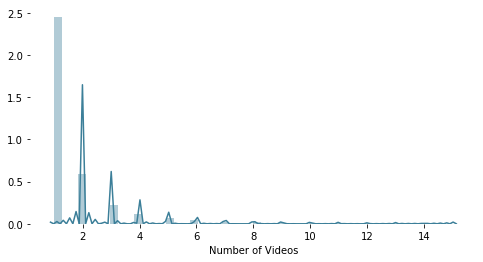

In [122]:
#Distribution of a user's Danmu posting across different videos
danmu_diff_video = table_4.user_id_hash.value_counts()
fig= plt.subplots(figsize = (8,4))
sns.distplot(danmu_diff_video[danmu_diff_video<=15],color='#3c7f99')
#plt.title("How many different videos each user posting danmus on",fontsize=16)
plt.xlabel('Number of Videos')
plt.box(False)
plt.show()

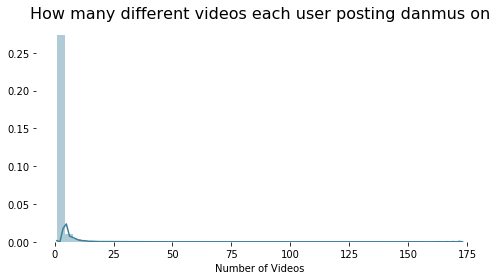

In [144]:
fig= plt.subplots(figsize = (8,4))
sns.distplot(danmu_diff_video,color='#3c7f99')
plt.title("How many different videos each user posting danmus on",fontsize=16)
plt.xlabel('Number of Videos')
plt.box(False)
plt.show()

In [4]:
#danmu_diff_video[danmu_diff_video<=2]

In [5]:
#1778531/2097069

In [134]:
#table_1['values'] = np.ones(table_1.shape[0])

In [116]:
#table_user = table_1.groupby(['user_id_hash','category']).sum()
#table_user.pivot(index = 'user_id_hash',columns = 'category',values = 'values')

In [127]:
#new_table = table_user.reset_index()
#user_pivot = 
#user_pivot = user_pivot.fillna(0)

In [133]:
#user_pivot.head()

In [147]:
table_2 = table_1.groupby(['user_id_hash','category']).count().reset_index()
#table_2.user_id_hash.value_counts()

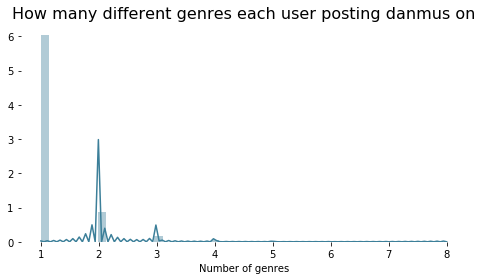

In [148]:
#Distribution of a user's Danmu posting across different video genres
danmu_diff_genre = table_2.user_id_hash.value_counts()
fig= plt.subplots(figsize = (8,4))
sns.distplot(danmu_diff_genre,color='#3c7f99')
plt.title("How many different genres each user posting danmus on",fontsize=16)
plt.xlabel('Number of genres')
plt.box(False)

84.6% users posted danmus on only one genre.

## Video part

### 1. Overall

In [28]:
df_video = df[['category','video_id']]
df_video['value'] = 1
df_video_density = df_video.groupby('video_id').sum().reset_index()
df_density = df_video_density.merge(video_pd, on = 'video_id')
df_density['danmus_density'] = df_density['value']/df_density['duration']
df_density.head(1)

,video_id,value,category,title,desc,duration,pubdate,favorite,coin,view,share,danmus_density
0,4442,2999,bangumi,龙娘七七七埋藏的宝藏-11,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1379,2014-06-20 01:00:46.0,141619,149,None,None,2.17476


In [30]:
df_density.shape

(4435, 12)

In [31]:
df_density[df_density.view.isnull()].shape

(1012, 12)

In [32]:
df_density[df_density.share.isnull()].shape

(1012, 12)

In [33]:
df_density[df_density.favorite.isnull()].shape

(226, 12)

In [35]:
df_nona = df_density.dropna()
df_nona.shape

(3423, 12)

In [36]:
df_nona['density_n'] = df_nona['danmus_density']/df_nona['view']
df_nona['favorite_n'] = df_nona['favorite']/df_nona['view']
df_nona['coin_n'] = df_nona['coin']/df_nona['view']
df_nona['share_n'] = df_nona['share']/df_nona['view']

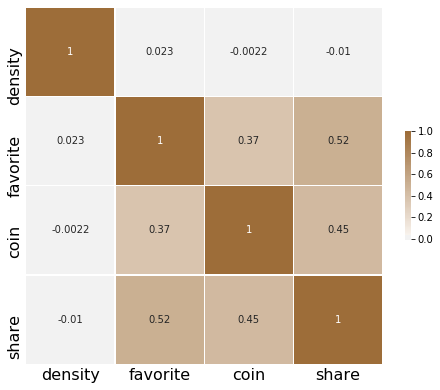

In [38]:
fig= plt.subplots(figsize = (8,8))
matrix = df_nona[['density_n', 'favorite_n', 'coin_n', 'share_n']]
matrix.columns = ['density','favorite', 'coin', 'share']
matrix = matrix.astype('float')


matrix = matrix.corr()
mask = np.zeros_like(matrix,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(225, 45, as_cmap=True)

sns.heatmap(matrix, cmap = cmap, center = 0,annot = True,square = True, linewidth = 0.25,cbar_kws= {'shrink':0.25})
plt.tick_params(axis = 'both',which = 'both',length = 0)
plt.tick_params(axis = 'both',which = 'major', labelsize = 16)
pass

In [34]:
#226 videos have no pubdate,dropt them for the analysis
df_density[df_density.pubdate.isnull()].shape

(226, 12)

In [41]:
#pubdate [793:] is timestamp
keep_index = df_density[df_density.pubdate.notna()].index
pub_analysis = df_density[df_density.index.isin(keep_index)]
pub_analysis.pubdate[786:] = pub_analysis.pubdate[786:].apply(datetime.utcfromtimestamp)

In [42]:
str_time = pub_analysis.pubdate[:786]
str_time_trans = str_time.apply(lambda x:x[:-2])
str_trans = str_time_trans.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [45]:
time_gmt8[0].replace(tzinfo=None)

Timestamp('2011-11-22 23:30:07')

In [44]:
#transform to gmt8
gmt8 = pytz.timezone('Etc/GMT+8')
utc = pytz.timezone('UTC')
time_trans = pub_analysis.pubdate[786:]
time_trans = time_trans.apply(utc.localize)
time_gmt8 = []
for i in range(time_trans.shape[0]):
    time_gmt8.append(list(time_trans)[i].astimezone(gmt8).replace(tzinfo=None))

In [46]:
timestamp_gmt = list(str_trans) + time_gmt8 
len(timestamp_gmt)

4209

In [47]:
pub_analysis['date_time'] = timestamp_gmt
pub_analysis.head(1)

,video_id,value,category,title,desc,duration,pubdate,favorite,coin,view,share,danmus_density,date_time
0,4442,2999,bangumi,龙娘七七七埋藏的宝藏-11,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1379,2014-06-20 01:00:46.0,141619,149,None,None,2.17476,2014-06-20 01:00:46


In [48]:
#Outlier 15999
pub_analysis[pub_analysis.date_time == '2016-09-01 04:35:43']

,video_id,value,category,title,desc,duration,pubdate,favorite,coin,view,share,danmus_density,date_time
1867,6117110,1074,dance,【极乐净土】咬人猫/有咩酱/赤九玖❤155小分队o(*≧▽≦)ツ,自制 极乐净土原作一出大家就决定要一起翻跳。155小分队的每一次合舞都很艰辛，这次也计划了很...,227,2016-09-01 12:35:43,379508,345987,14366480,105266,4.73128,2016-09-01 04:35:43


In [258]:
pub_analysis['date_time'].dtype

dtype('<M8[ns]')

In [267]:
#d = datetime.date(2018, 12, 31)
datetime(2018, 12, 31)

datetime.datetime(2018, 12, 31, 0, 0)

In [268]:
pub_analysis['length'] = datetime(2018, 12, 31) - pub_analysis['date_time']

In [269]:
pub_analysis.head()

,video_id,value,category,title,desc,duration,pubdate,favorite,coin,view,share,danmus_density,date_time,length
0,4442,2999,bangumi,龙娘七七七埋藏的宝藏-11,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1379,2014-06-20 01:00:46.0,141619,149,None,None,2.17476,2014-06-20 01:00:46,1654 days 22:59:14
1,4443,2999,bangumi,龙娘七七七埋藏的宝藏-10,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1380,2014-06-13 01:01:39.0,141619,40,None,None,2.17319,2014-06-13 01:01:39,1661 days 22:58:21
2,4444,2997,bangumi,龙娘七七七埋藏的宝藏-9,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1380,2014-06-06 01:00:27.0,141619,38,None,None,2.17174,2014-06-06 01:00:27,1668 days 22:59:33
3,4445,2996,bangumi,龙娘七七七埋藏的宝藏-8,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1380,2014-05-30 01:03:37.0,141619,51,None,None,2.17101,2014-05-30 01:03:37,1675 days 22:56:23
4,4446,2997,bangumi,龙娘七七七埋藏的宝藏-7,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1379,2014-05-23 01:14:43.0,141619,70,None,None,2.17331,2014-05-23 01:14:43,1682 days 22:45:17


In [49]:
pub_analysis_pub = pub_analysis[['value','date_time']]
mean_danmus = pub_analysis_pub.groupby('date_time').mean().reset_index()
normal_danmus = mean_danmus[mean_danmus.value!=15999]

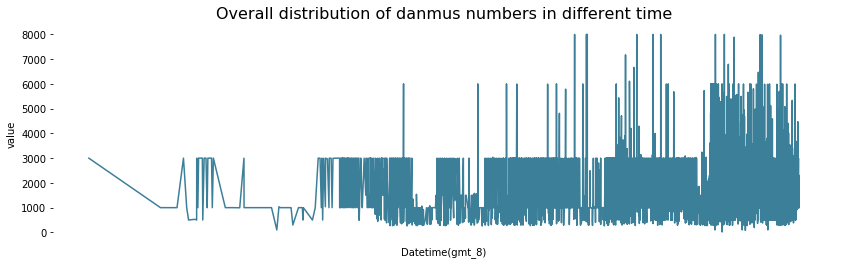

In [54]:
fig,ax= plt.subplots(figsize = (14,4))
sns.lineplot(x = normal_danmus.date_time, y = normal_danmus.value, color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of danmus numbers in different time',fontsize=16)
plt.box(False)
plt.show()

In [57]:
normal_danmus.date_time[2000:]

2001   2017-04-18 01:30:00
2002   2017-04-18 07:10:46
2003   2017-04-20 04:24:34
2004   2017-04-20 19:38:44
2005   2017-04-21 01:35:08
2006   2017-04-21 17:12:38
2007   2017-04-22 06:41:38
2008   2017-04-22 08:22:44
2009   2017-04-23 01:00:00
2010   2017-04-23 02:07:35
2011   2017-04-23 06:15:31
2012   2017-04-23 08:41:53
2013   2017-04-23 19:39:20
2014   2017-04-25 01:30:00
2015   2017-04-25 14:55:47
2016   2017-04-25 21:23:33
2017   2017-04-25 22:56:16
2018   2017-04-26 01:09:13
2019   2017-04-26 09:31:15
2020   2017-04-27 02:17:19
2021   2017-04-27 05:56:39
2022   2017-04-28 06:23:45
2023   2017-04-28 20:25:36
2024   2017-04-29 04:43:34
2025   2017-04-29 05:07:57
2026   2017-04-29 07:50:55
2027   2017-04-29 08:00:45
2028   2017-04-29 11:35:29
2029   2017-04-29 22:09:27
2030   2017-04-30 01:00:00
               ...        
4064   2018-06-29 04:50:24
4065   2018-06-29 10:31:59
4066   2018-06-29 15:52:17
4067   2018-06-29 23:17:41
4068   2018-06-30 06:22:58
4069   2018-06-30 11:50:49
4

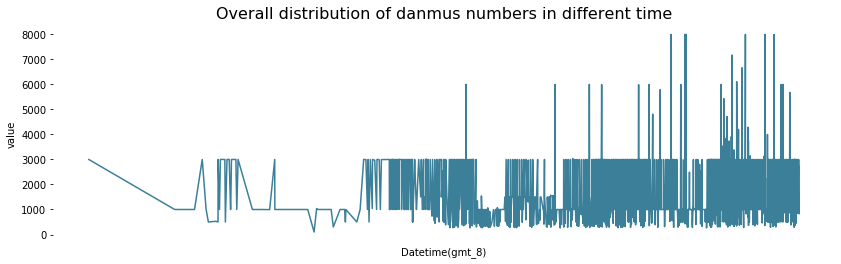

In [59]:
fig,ax= plt.subplots(figsize = (14,4))
sns.lineplot(x = normal_danmus.date_time[:2000], y = normal_danmus.value[:2000], color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of danmus numbers in different time',fontsize=16)
plt.box(False)
plt.show()

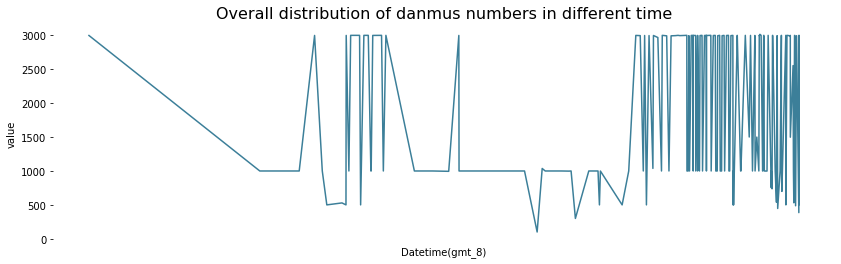

In [63]:
fig,ax= plt.subplots(figsize = (14,4))
sns.lineplot(x = normal_danmus.date_time[:180], y = normal_danmus.value[:180], color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of danmus numbers in different time',fontsize=16)
plt.box(False)
plt.show()

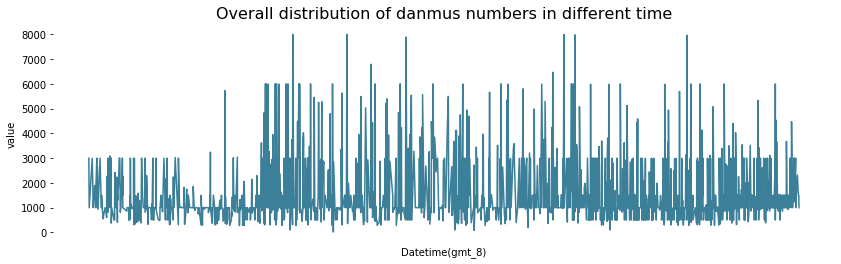

In [58]:
fig,ax= plt.subplots(figsize = (14,4))
sns.lineplot(x = normal_danmus.date_time[2000:], y = normal_danmus.value[2000:], color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of danmus numbers in different time',fontsize=16)
plt.box(False)
plt.show()

In [52]:
densitys = pub_analysis[['date_time','danmus_density']]
densitys.danmus_density = densitys.danmus_density.astype('float')
densitys.shape

(4209, 2)

In [438]:
densitys[densitys.danmus_density>=30]

,date_time,danmus_density
3162,2017-12-02 20:42:48,33.333333


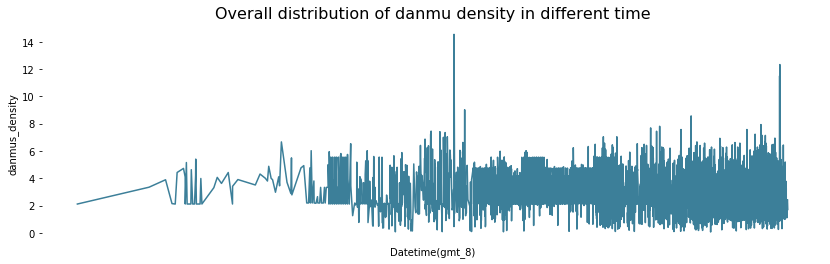

In [55]:
fig,ax= plt.subplots(figsize = (14,4))
sns.lineplot(x = densitys.date_time, y = densitys.danmus_density[densitys.danmus_density<30], color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of danmu density in different time',fontsize=16)
plt.box(False)
plt.show()

In [176]:
normal_danmus.value.describe()

count    4093.000000
mean     1463.341008
std      1121.373747
min        16.000000
25%       996.000000
50%      1000.000000
75%      1500.000000
max      8000.000000
Name: value, dtype: float64

In [179]:
pub_analysis_pub.date_time.describe()

count                    4209
unique                   4094
top       2012-10-04 00:09:54
freq                       24
first     2011-02-24 18:15:59
last      2018-07-06 02:13:45
Name: date_time, dtype: object

In [196]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2014)].count()

value        299
date_time    299
dtype: int64

In [197]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2015)].count()

value        573
date_time    573
dtype: int64

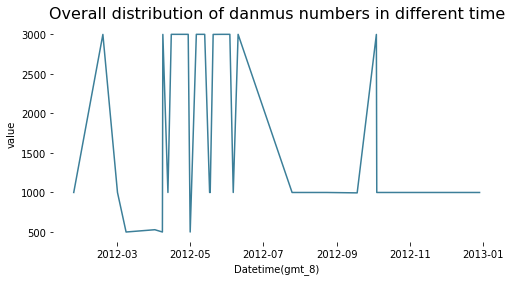

In [64]:
value_2012 = pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2012)]
fig= plt.subplots(figsize = (8,4))
sns.lineplot(x = value_2012.date_time, y = value_2012.value, color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
plt.title('Overall distribution of danmus numbers in different time',fontsize=16)
plt.box(False)
plt.show()

In [219]:
value_2012.date_time.apply(lambda x: x.date().month).value_counts()

10    26
2     13
5      7
4      7
6      3
8      2
3      2
12     1
9      1
7      1
1      1
Name: date_time, dtype: int64

In [217]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2012)].count()

value        64
date_time    64
dtype: int64

In [200]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2016)].count()

value        777
date_time    777
dtype: int64

In [201]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2017)].count()

value        1230
date_time    1230
dtype: int64

In [202]:
pub_analysis_pub[pub_analysis_pub.date_time.apply(lambda x: x.date().year == 2018)].count()

value        1172
date_time    1172
dtype: int64

In [220]:
#幸运星24集在同一时间上传
#pub_analysis[pub_analysis.date_time == '2012-10-04 00:09:54']

In [246]:
df_video = df[['category','video_id']]
df_video['value'] = 1
df_video_density = df_video.groupby('video_id').sum().reset_index()
df_density = df_video_density.merge(video_pd, on = 'video_id')
df_density['density'] = df_density['value']/df_density['duration']
df_density.head(1)

,video_id,value,category,title,desc,duration,pubdate,favorite,coin,view,share,density
0,4442,2999,bangumi,龙娘七七七埋藏的宝藏-11,男主角八真重护因不愿意继承家业，而被父亲宣告断绝亲子关系，并被迫离家搬到一座人工学园岛居住。...,1379,2014-06-20 01:00:46.0,141619,149,None,None,2.17476


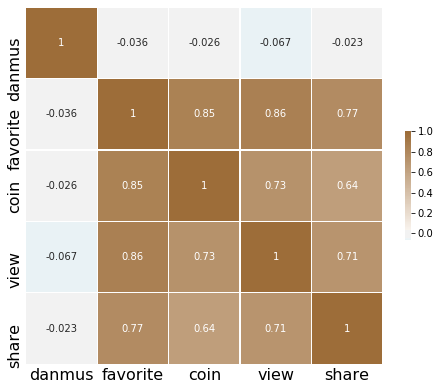

In [433]:
fig= plt.subplots(figsize = (8,8))
matrix = df_nona[['value', 'favorite', 'coin', 'view', 'share']]
matrix.columns = ['danmus','favorite', 'coin', 'view', 'share']
matrix = matrix.astype('float')


matrix = matrix.corr()
mask = np.zeros_like(matrix,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(225, 45, as_cmap=True)

sns.heatmap(matrix, cmap = cmap, center = 0,annot = True,square = True, linewidth = 0.25,cbar_kws= {'shrink':0.25})
plt.tick_params(axis = 'both',which = 'both',length = 0)
plt.tick_params(axis = 'both',which = 'major', labelsize = 16)
pass

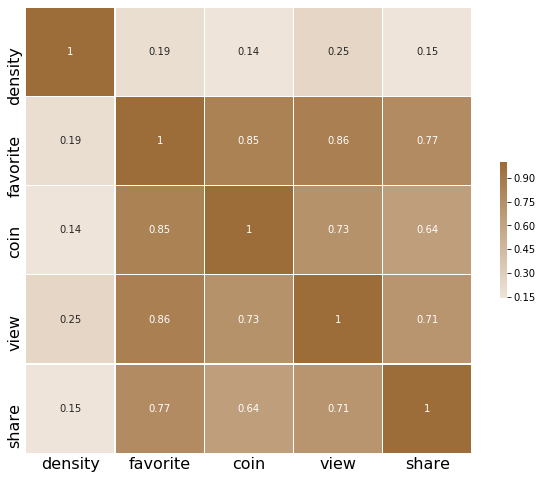

In [432]:
fig= plt.subplots(figsize = (10,10))
matrix = df_nona[['density', 'favorite', 'coin', 'view', 'share']]
matrix = matrix.astype('float')
matrix = matrix.corr()
mask = np.zeros_like(matrix,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(225, 45, as_cmap=True)

sns.heatmap(matrix, cmap = cmap, center = 0,annot = True,square = True, linewidth = 0.25,cbar_kws= {'shrink':0.25})
plt.tick_params(axis = 'both',which = 'both',length = 0)
plt.tick_params(axis = 'both',which = 'major', labelsize = 16)
pass

In [66]:
favorites = pub_analysis[['date_time','favorite']]
favorites.favorite = favorites.favorite.astype('float')
favorites.shape

(4209, 2)

In [286]:
favorites.favorite.describe()

count    4.209000e+03
mean     6.274223e+04
std      2.175377e+05
min      0.000000e+00
25%      1.305000e+03
50%      3.449000e+03
75%      1.400700e+04
max      2.464972e+06
Name: favorite, dtype: float64

In [68]:
shares = pub_analysis[['date_time','share']]
shares.share = shares.share.astype('float')
shares.shape

(4209, 2)

In [287]:
shares.share.describe()

count      3423.000000
mean       1321.744668
std        4315.650217
min           0.000000
25%         149.000000
50%         429.000000
75%        1170.500000
max      112475.000000
Name: share, dtype: float64

In [69]:
coins = pub_analysis[['date_time','coin']]
coins.coin = coins.coin.astype('float')
coins.shape

(4209, 2)

In [70]:
views = pub_analysis[['date_time','view']]
views.view = views.view.astype('float')
views.shape

(4209, 2)

In [290]:
views.view.describe()

count    3.423000e+03
mean     2.576130e+05
std      4.791581e+05
min      3.100000e+02
25%      5.881600e+04
50%      1.379440e+05
75%      3.011150e+05
max      1.436648e+07
Name: view, dtype: float64

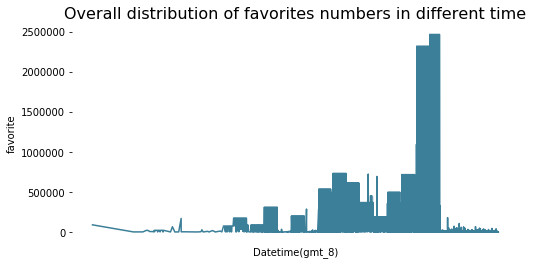

In [67]:
fig,ax= plt.subplots(figsize = (8,4))
sns.lineplot(x = favorites.date_time, y = favorites.favorite, color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of favorites numbers in different time',fontsize=16)
plt.box(False)
plt.show()

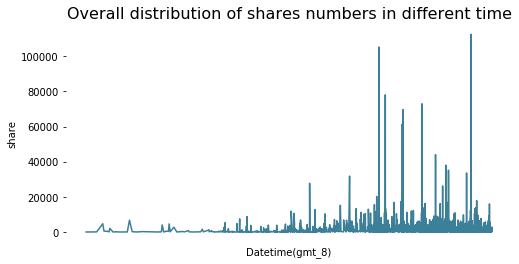

In [71]:
fig,ax= plt.subplots(figsize = (8,4))
sns.lineplot(x = shares.date_time, y = shares.share, color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of shares numbers in different time',fontsize=16)
plt.box(False)
plt.show()

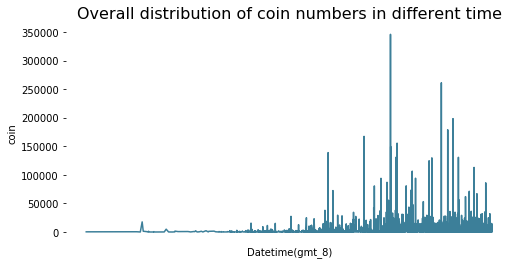

In [72]:
fig,ax= plt.subplots(figsize = (8,4))
sns.lineplot(x = coins.date_time, y = coins.coin, color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of coin numbers in different time',fontsize=16)
plt.box(False)
plt.show()

In [442]:
views[views.view==14366480]

,date_time,view
1867,2016-09-01 04:35:43,14366480.0


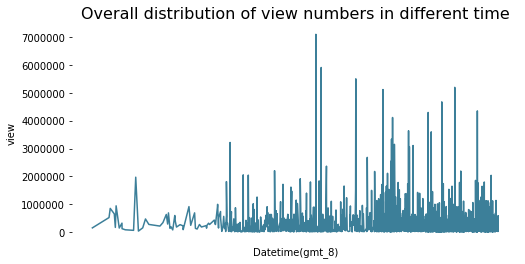

In [73]:
fig,ax= plt.subplots(figsize = (8,4))
sns.lineplot(x = views.date_time, y = views.view[views.view<14366480], color='#3c7f99')
plt.xlabel('Datetime(gmt_8)')
ax.get_xaxis().set_ticks([])
plt.title('Overall distribution of view numbers in different time',fontsize=16)
plt.box(False)
plt.show()

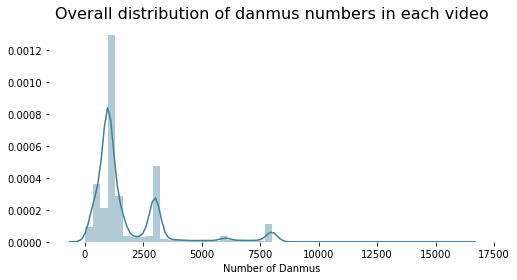

In [12]:
fig= plt.subplots(figsize = (8,4))
sns.distplot(df.video_id.value_counts(),color='#3c7f99')
plt.xlabel('Number of Danmus')
plt.title('Overall distribution of danmus numbers in each video',fontsize=16)
plt.box(False)
plt.show()

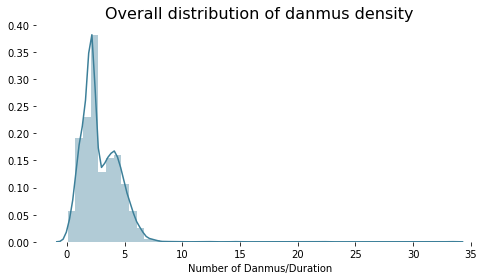

In [19]:
fig= plt.subplots(figsize = (8,4))
sns.distplot(df_density['danmus_density'],color='#3c7f99')
plt.xlabel('Number of Danmus/Duration')
plt.title('Overall distribution of danmus density',fontsize=16)
plt.box(False)
plt.show()

In [428]:
df_density['danmus_density'].describe()

count     4435.000000
unique    2868.000000
top          2.112676
freq        98.000000
Name: danmus_density, dtype: float64

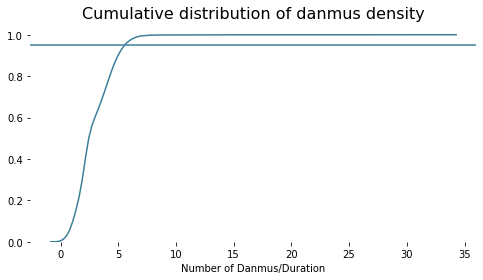

In [431]:
fig= plt.subplots(figsize = (8,4))
sns.kdeplot(df_density['danmus_density'],cumulative = True,color='#3c7f99',legend = False)
plt.xlabel('Number of Danmus/Duration')
plt.title('Cumulative distribution of danmus density',fontsize=16)
plt.axhline(0.95,0,8,label = '90%',color='#3c7f99')
plt.box(False)
plt.show()

In [174]:
overall_video = df.video_id.value_counts()
statis_overall = overall_video.describe()
overall_video_pd = pd.DataFrame(statis_overall).transpose()
overall_video_pd['mode'] = overall_video.mode()[0]

In [177]:
over_video_pd = overall_video_pd[['count','mean','50%','mode','min','max','std']]
over_video_pd.columns = ['count','mean','medium','mode','min','max','std']
over_video_pd

,count,mean,medium,mode,min,max,std
video_id,4435.0,1786.744758,1000.0,1000,16.0,15999.0,1721.099261


In [13]:
statis_overall.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [178]:
dance_stat_overall = dance.video_id.value_counts().describe()
dance_video_pd = pd.DataFrame(dance_stat_overall)
show_stat_overall = show.video_id.value_counts().describe()
show_video_pd = pd.DataFrame(show_stat_overall)
music_stat_overall = music.video_id.value_counts().describe()
music_video_pd = pd.DataFrame(music_stat_overall)
play_stat_overall = play.video_id.value_counts().describe()
play_video_pd = pd.DataFrame(play_stat_overall)
sport_stat_overall = sport.video_id.value_counts().describe()
sport_video_pd = pd.DataFrame(sport_stat_overall)
tech_stat_overall = tech.video_id.value_counts().describe()
tech_video_pd = pd.DataFrame(tech_stat_overall)
bangumi_stat_overall = bangumi.video_id.value_counts().describe()
bangumi_video_pd = pd.DataFrame(bangumi_stat_overall)
movie_stat_overall = movie.video_id.value_counts().describe()
movie_video_pd = pd.DataFrame(movie_stat_overall)

In [179]:
genre_video_pd = pd.DataFrame(np.c_[dance_video_pd,show_video_pd,music_video_pd,play_video_pd,sport_video_pd,
                  tech_video_pd,bangumi_video_pd,movie_video_pd])
genre_video_pd.columns = category
genre_video_pd.index = statis_overall.index

In [180]:
genre_trans = genre_video_pd.transpose()

In [181]:
#genre_video_pd = genre_video_pd.transpose()
genre_trans['mode'] = np.array([dance.video_id.value_counts().mode()[0],
                                 show.video_id.value_counts().mode()[0],
                                 music.video_id.value_counts().mode()[0],
                                 play.video_id.value_counts().mode()[0],
                                 sport.video_id.value_counts().mode()[0],
                                 tech.video_id.value_counts().mode()[0],
                                 bangumi.video_id.value_counts().mode()[0],
                                 movie.video_id.value_counts().mode()[0]])

In [182]:
genre_trans_pd = genre_trans[['count','mean','50%','mode','min','max','std']]
genre_trans_pd.columns = ['count','mean','medium','mode','min','max','std']
genre_trans_pd

,count,mean,medium,mode,min,max,std
dance,593.0,1157.045531,1000.0,1000,16.0,8000.0,783.305696
show,524.0,2478.942748,2610.0,1000,497.0,8000.0,1589.926076
music,564.0,608.184397,482.5,1000,100.0,6000.0,522.686119
play,594.0,973.712121,999.0,1000,81.0,7997.0,512.216224
sport,555.0,1626.187387,1460.0,1000,100.0,7997.0,948.660051
tech,593.0,1164.379427,1000.0,1000,100.0,5995.0,610.214248
bangumi,786.0,2286.404580,2997.0,3000,989.0,15999.0,1188.481368
movie,226.0,7201.738938,7995.0,8000,1496.0,8009.0,1609.016008


### 2. Genre-specific

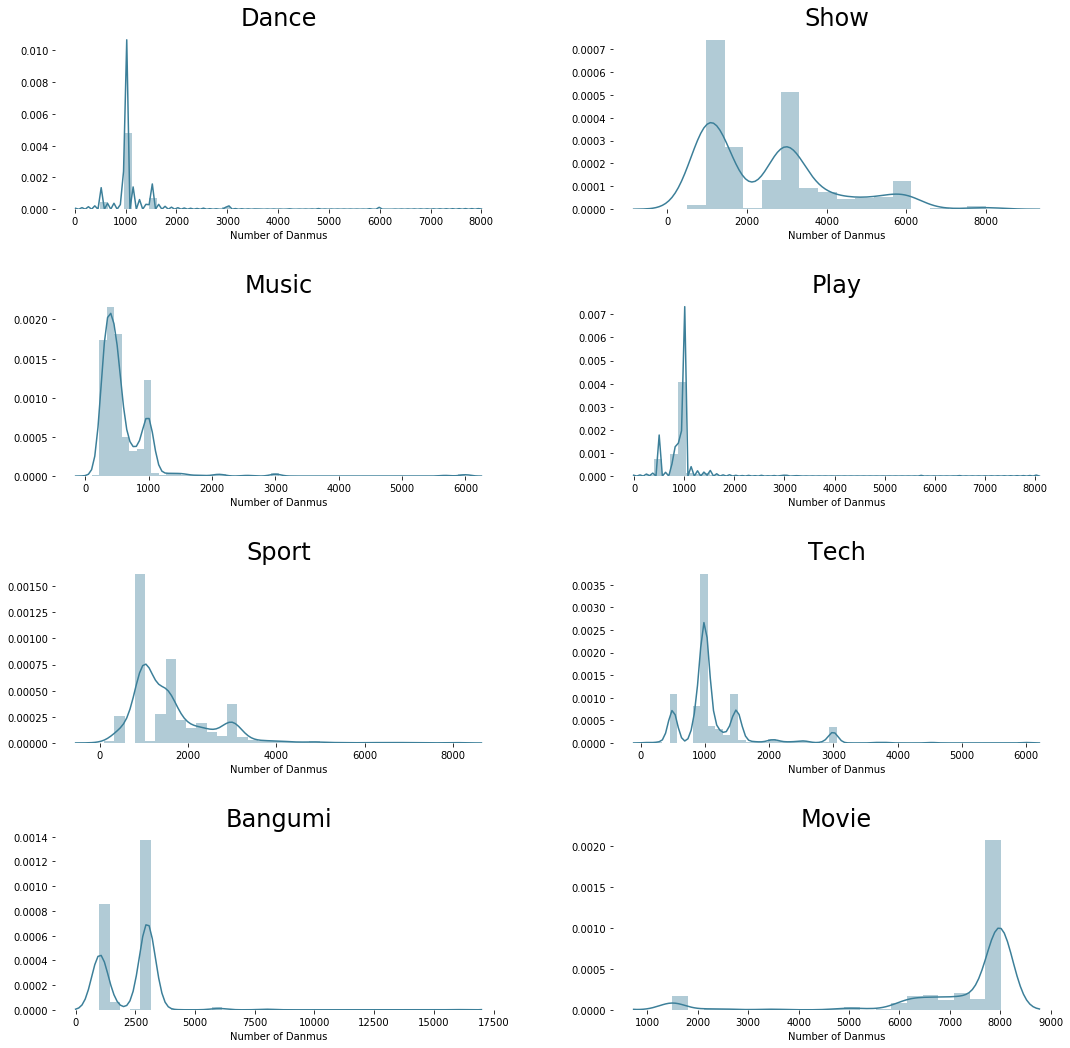

In [153]:
fig,ax= plt.subplots(figsize = (18,18))
grid = plt.GridSpec(4,2,wspace = 0.25,hspace = 0.5)
plt.subplot(grid[0,0])
sns.distplot(dance.video_id.value_counts(), color='#3c7f99')
plt.title('Dance', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[0,1])
sns.distplot(show.video_id.value_counts(), color='#3c7f99')
plt.title('Show', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[1,0])
sns.distplot(music.video_id.value_counts(), color='#3c7f99')
plt.title('Music', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[1,1])
sns.distplot(play.video_id.value_counts(), color='#3c7f99')
plt.title('Play', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[2,0])
sns.distplot(sport.video_id.value_counts(), color='#3c7f99')
plt.title('Sport', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[2,1])
sns.distplot(tech.video_id.value_counts(), color='#3c7f99')
plt.title('Tech', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[3,0])
sns.distplot(bangumi.video_id.value_counts(), color='#3c7f99')
plt.title('Bangumi', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

plt.subplot(grid[3,1])
sns.distplot(movie.video_id.value_counts(), color='#3c7f99')
plt.title('Movie', fontsize=24)
plt.xlabel('Number of Danmus')
plt.box(False)

### 3. Top 10 videos

In [5]:
# Within each genre, list the top 10 videos with the most Danmus and sort them according to the descending number of Danmus
dance_10 = df[df.category == 'dance'].video_id.value_counts()[:10]
dance_10_pd = pd.DataFrame(dance_10).reset_index()
dance_10_pd.columns = ['video_id','number of danmus']
dance_10_pd['genre'] = 'dance'
dance_10_pd

,video_id,number of danmus,genre
0,7781712,8000,dance
1,13732768,7999,dance
2,15954749,7883,dance
3,17847470,6000,dance
4,19578407,6000,dance
5,3484492,6000,dance
6,5804542,5998,dance
7,3748007,5787,dance
8,3560599,4811,dance
9,6999907,4222,dance


In [72]:
play_10 = df[df.category == 'play'].video_id.value_counts()[:10]
play_10_pd = pd.DataFrame(play_10).reset_index()
play_10_pd.columns = ['video_id','number of danmus']
play_10_pd

,video_id,number of danmus
0,8277772,7997
1,19046008,6467
2,12132110,5728
3,12135095,3244
4,12379077,3038
5,16568836,2999
6,7708411,2970
7,9860719,2760
8,17988758,2524
9,24114933,2253


In [6]:
dance_video_id = list(dance_10_pd.video_id)

In [11]:
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(dance_10_pd.video_id):
        print(jsons[i]['video_id'])

13732768
15954749
17847470
19578407
3484492
3560599
3748007
5804542
6999907
7781712


In [34]:
dance_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(dance_10_pd.video_id):
        dance_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

In [37]:
dance_pd_frame = pd.concat(dance_frames)
dance_top_10 = dance_10_pd.merge(dance_pd_frame,on = 'video_id')
dance_top_10

,video_id,number of danmus,genre,category,title,desc,duration,pubdate,favorite,coin,view,share
0,7781712,8000,dance,dance,【年刊】2016年哔哩哔哩舞蹈区总排行榜,2016年舞蹈区年榜如约和大家见面啦~\n特别感谢sl重新编写的数据抓取程序，2min搞定所...,3608,1483173145,2615,913,67222,327
1,13732768,7999,dance,dance,【足太ぺんた】新109曲不间断连跳【做出来跳了一下】,久违的超长时间连跳！\n画质与音质，还有跳错的地方大家多包涵！\n这就是现在的我的全部实力！...,3687,1503524908,11333,27809,165988,2579
2,15954749,7883,dance,dance,【足太ぺんた】最新113曲连跳 做出来跳了跳【生日作】,创作类型: 翻跳\n编舞出处: 谢谢所有编舞\n歌曲出处: 以及所有歌曲作者\n简介: 这次...,3815,1509638409,8706,13860,146811,1020
3,17847470,6000,dance,dance,【年刊】2017年哔哩哔哩舞蹈区排行榜,一年一度的哔哩哔舞蹈区总排行榜终于和大家见面了。\r\n与2016年av7781712与20...,2445,1514777455,3911,1620,71101,646
4,19578407,6000,dance,dance,【年刊】2017年哔哩哔哩舞蹈排行榜,自制 终于完成了\r\n统计：秒米娜特+Shyvana\r\n制作：幻dream\r\n排名...,2845,1518579105,853,662,26213,236
5,3484492,6000,dance,dance,【年刊】2015年哔哩哔哩舞蹈区总排行榜TOP100,自制 年刊终于在年前赶出来和大家见面了~！\r\n在此特别感谢@bili的非日常@失礼君@黄...,2434,1451544659,6517,1250,158736,827
6,5804542,5998,dance,dance,【LOVE LIVE!】波利花菜园-武汉AnimePower05-现场-水团+μ's24连跳,8月夏天决定跳24连的时候真的感觉自己疯了！中途体力不够脑力不够有些许的小错误，为了让舞蹈无...,2530,1471103070,9693,13432,260709,2273
7,3748007,5787,dance,dance,【年刊】2015年哔哩哔哩舞蹈排行榜,自制 \r\n统计：秒米娜特\r\n制作：我不是小凌\r\n关注她/他！！！关注她/他！！！...,2992,1454534936,969,657,34002,103
8,3560599,4811,dance,dance,【2015星漫祭】宅舞大赛·男神女神都来啦！高清全场,自制 【2015第一届星漫祭】是腾讯动漫星漫奖的收官晚会，也是一次宅舞的盛会，感谢所有支持的...,2420,1452497476,2012,437,81002,320
9,6999907,4222,dance,dance,【青空月子】♫LoveLive！84曲连跳♫50分钟超耐久【四周年】,在四年前初投稿的地方录了这次四周年全曲连跳。\n衣服是1st live上μ‘s的同款演出服，...,3071,1478501208,3560,8377,65253,524


In [34]:
#dance_desc_pd = pd.DataFrame(np.c_[dance_video,dance_desc])
#dance_desc_pd.columns = ['video_id','description']

In [35]:
dance_desc_pd = pd.DataFrame.from_dict(data = dance_desc,orient = 'index').reset_index()
dance_desc_pd.columns = ['video_id','description']

In [51]:
#dance_top_10 = dance_10_pd.merge(dance_desc_pd,on = 'video_id')
#dance_top_10.to_csv('dance_10.csv')
#dance_top_10['availability'] = 'Yes'
#dance_top_10.iloc[8,4] = 'No'
#dance_top_10

In [50]:
show_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(show_10_pd.video_id):
        show_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

In [52]:
show_10 = df[df.category == 'show'].video_id.value_counts()[:10]
show_10_pd = pd.DataFrame(show_10).reset_index()
show_10_pd.columns = ['video_id','number of danmus']
show_10_pd

,video_id,number of danmus
0,14829835,8000
1,19368415,7990
2,19654229,7981
3,22642595,7965
4,15312349,6791
5,16489412,6000
6,13902171,6000
7,14566489,6000
8,13047445,6000
9,14152349,6000


In [53]:
#show_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(show_10_pd.video_id):
        #show_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#show_desc_pd = pd.DataFrame.from_dict(data = show_desc,orient = 'index').reset_index()
#show_desc_pd.columns = ['video_id','description']
#show_top_10 = show_10_pd.merge(show_desc_pd,on = 'video_id')

In [56]:
#show_top_10['availability'] = 'Yes'
show_pd_frame = pd.concat(show_frames)
show_top_10 = show_10_pd.merge(show_pd_frame,on = 'video_id')
show_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,14829835,8000,show,【通灵之战/挑战通灵者】S18E01 森森俄语控字幕组 说说你最喜欢谁,http://tnt-online.ru/?f=32\n【通灵之战/挑战通灵者】S18E01...,4504,1506451698,2245,2370,147194,1886
1,19368415,7990,show,【TF家族】星期五练习生之第二人生篇,TF家族自制综艺《星期五练习生之第二人生篇》,4256,1518173571,6376,5783,415557,2648
2,19654229,7981,show,TF家族冬季运动会,TF家族冬季运动会,4777,1518764413,5929,5988,359699,2945
3,22642595,7965,show,【TF家族】星期五练习生之冒险特辑,TF家族星期五练习生之冒险特辑送上~,3921,1524826181,3911,2953,263009,2580
4,15312349,6791,show,【通灵之战/挑战通灵者】S18E03 171007 森森俄语控字幕组,https://rutube.ru/metainfo/tv/36/season18\n【通灵...,4345,1507750199,1073,1146,110909,459
5,16489412,6000,show,【ARASHI】【字】周六的岚朋友 菅田将晖 【Aloha字幕组】,ALOHA\nAloha字幕组\n本期交岚纪念馆☞菅田将晖\n破天荒破天荒！\n这样的精气满...,2765,1511099457,4265,1751,203287,1337
6,13902171,6000,show,【欅会不会写】EP94 汉字欅坂VS平假名欅坂 浴衣卡拉OK大赛【坂道之诗】,【坂道之诗】\n170827 欅って、書けない？ EP94 一小时特别篇\r\n汉字欅坂VS...,3032,1503894960,1924,869,66670,390
7,14566489,6000,show,【ARASHI】【字】周六的岚朋友 170916 佐藤健 绫野刚【Aloha字幕组】,aloha字幕组\n停播三周！停播三周！停播三周！下次交岚SP将于10月14日播出\nAlo...,2765,1505671124,3277,1375,186194,1305
8,13047445,6000,show,【ARASHI】【字】170805 周六的岚朋友 松冈茉优 井本绚子【Aloha字幕组】,Aloha\n松冈茉优口若悬河细数早安娘，反差萌催眠全场；\n井本绚子身为女艺人居然在模仿上...,2764,1502047678,2670,1475,174172,790
9,14152349,6000,show,【ARASHI】【字】170902 周六的岚朋友 近藤春菜 加藤谅 Perfume【Aloh...,aloha字幕组\nAloha\n本期交岚纪念馆~近藤春菜的野营之歌教学，还有超敬业的润式打...,2765,1504486293,2647,1299,160219,437


In [58]:
music_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(music_10_pd.video_id):
        music_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

music_10 = df[df.category == 'music'].video_id.value_counts()[:10]
music_10_pd = pd.DataFrame(music_10).reset_index()
music_10_pd.columns = ['video_id','number of danmus']

music_pd_frame = pd.concat(music_frames)
music_top_10 = music_10_pd.merge(music_pd_frame,on = 'video_id')
music_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,1160990,6000,music,【高清】历代高达OP合集 (0079 - AGE),Youtube by SmilyT1 历代高达OP (0079 - AGE),3498,1401529681,2941,313,77787,115
1,2090050,5999,music,1966-2014奥特曼主题曲合集（720p重制版）,yuoku 素材来自yuoku，自己剪辑，素材原PO主：HB2803087702，视频原标题...,3236,1425807616,3928,435,131475,285
2,9266728,5680,music,【火影OP完整】有多少影迷想要看完整过过瘾却找不到！！,http://www.360kan.com/ct/QUbkbcLWLYz3ED.html 身...,2581,1489919109,7599,1912,98957,788
3,1068364,3000,music,家庭教师OP/ED合集！【字幕版】,。。,1946,1397717583,1276,241,25855,50
4,1002003,3000,music,那些年在电视台播出时进行过较大改动的OP、ED,二次创作 电视台播出时一些动画的片头片尾进行过改动，这里是改动较大的几部，本视频把原版和内地...,1571,1394348274,1282,100,56242,57
5,19530776,3000,music,那些年我们单曲循环的十大动漫神曲,转自狐妖小红娘，东京喰种，夏目友人帐，游戏人生op\n所属作品: 狐妖小红娘\n作词: 我不...,1233,1518489044,4108,668,148518,249
6,1016784,2554,music,50知名动漫OPED合集,新浪 本人在网上收集的50首动漫的OPED把它们连接在一起希望你能够喜欢下载地址http:/...,4599,1395185894,585,46,25001,8
7,12711561,2150,music,fate历代op集【~2017.7】,sm31537710\n作者：マツ\n画质有点（很）渣但是用作作业用bgm足够了\n原简介：...,3080,1501308060,2979,438,43651,154
8,14127659,2117,music,高达OP合集 (1979-2017),转自https://www.youtube.com/watch?v=b8XjNHICn6A\...,5024,1504420607,1376,198,22798,139
9,9234880,2050,music,【童年---现在】你永远不会跳的op和ed,http://bangumi.bilibili.com/anime/2543/play#84...,3132,1489818582,529,96,16275,57


In [73]:
play_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(play_10_pd.video_id):
        play_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

play_10 = df[df.category == 'play'].video_id.value_counts()[:10]
play_10_pd = pd.DataFrame(play_10).reset_index()
play_10_pd.columns = ['video_id','number of danmus']

play_pd_frame = pd.concat(play_frames)
play_top_10 = play_10_pd.merge(play_pd_frame,on = 'video_id')
play_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,8277772,7997,play,【民乐盛宴】2017Bilibili史上最强二胡演奏企划【传统与现代的激情碰撞】,历时近一年的精心打磨、集结海内外众多二胡演奏家及爱好者~\n二胡与二次元的完美结合、传统与现...,4089,1485640378,22705,17521,233571,3009
1,19046008,6467,play,【受C】用笔演奏一小时《彩虹猫》Penbeat,作品类型: 翻奏曲\n演奏乐器: Penbeat\n简介补充: 是时候展示真正的持久了,4274,1517570348,4202,7115,39669,427
2,12132110,5728,play,【街头表演】9个不可思议的街头表演,youtube\nyoutube,2913,1499853724,12310,2681,160256,2342
3,12135095,3244,play,【钢琴】震惊！知名 ACG 改编 up 主毕业了——Animenz 毕业音乐会,Animenz 毕业音乐会\n节目包含巴赫 BMW886，海顿 62 号奏鸣曲，拉赫 op....,3569,1499859827,3490,6212,167152,911
4,12379077,3038,play,【直播歌舞奏见夏令营】B站人肉曲库无缝连刷71首【Kyle钢琴】,欢迎7.21-7.23来B站大型漫展Bilibili World的黑白键舞台来现场点歌（白天...,4146,1500529388,3202,3593,77124,380
5,16568836,2999,play,【她总出品】我用女朋友的屁做了首原创曲（附教程）《音频采样的制作及应用》【她总玩设备】（吉他...,女朋友的B站ID@Tomatoko番茄子\r\n\r\n咱身为演奏区的脑洞担当，演奏技术好不...,925,1511347041,14769,22879,726367,10370
6,7708411,2970,play,圣诞快乐！yunyun女装 演奏会,乐谱网店 买谱子 私聊 qq 243515329 真爱粉！ qq 群 495483255...,1697,1482743207,254,382,34403,9
7,9860719,2760,play,【交响乐】舰娘3周年庆典音乐会 东京爱乐交响乐团,原作：DMM.com POWERCHORD STUDIO / 「艦これ」運営鎮守府(C2机关...,4645,1492256670,6592,1975,48243,740
8,17988758,2524,play,【Animenz】尼尔：机械纪元 组曲连弹 - Soundtrack Medley,作品类型: 翻奏曲\n演奏乐器: 钢琴\n简介补充: 大家好！这个视频是我 Youtube ...,945,1515142945,16625,24309,276720,3074
9,24114933,2253,play,9块到10000块的尤克里里音色究竟有什么不同？,听说好孩子都听得出差别？\n\n更多视频&amp;曲谱获取 \n微信公众号／微博：趣弹音乐 ...,1076,1527604093,2779,1473,71702,962


In [61]:
sport_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(sport_10_pd.video_id):
        sport_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

sport_10 = df[df.category == 'sport'].video_id.value_counts()[:10]
sport_10_pd = pd.DataFrame(sport_10).reset_index()
sport_10_pd.columns = ['video_id','number of danmus']

sport_pd_frame = pd.concat(sport_frames)
sport_top_10 = sport_10_pd.merge(sport_pd_frame,on = 'video_id')
sport_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,6886037,7997,sport,【胖球队】唱功排名（搞事情系列）（娱乐、西皮向）,第一次剪视频，之前传了一版，但是白屏太刺眼，又重新修改了。\n前前后后搞了快一个月，收集素材...,4153,1477801437,3729,911,58008,414
1,6325925,7171,sport,20160917-陈玘 映客直播（下半场）,各种动漫和电视剧、各种听歌唱歌、各种cp发糖，厉害了我的哥！\n最后回放里没有的飞吻，指路a...,4444,1474127368,1680,97,39563,41
2,6737468,6663,sport,20161019 陈玘映客直播,http://www.inke.cn/live.html?uid=12671674&amp;...,5601,1476858732,1996,174,55275,33
3,6507127,6108,sport,161002-陈玘 映客直播,myss到爆炸的一次直播！内容很丰富，各种糖都有。\n直接扒的回放，因为中间他有几次退出去看...,3988,1475421761,1779,271,50120,49
4,5961359,5434,sport,【张继科】直播会上瘾之160822花椒直播1小时完整版（公公婆婆来了）,自录,3769,1471889474,4396,390,187755,243
5,6324788,4915,sport,【许昕】160917 许昕 CCTV4 一直播（采访+个人直播）,一直播 【许昕】160917 许昕 CCTV4 一直播（采访+个人直播）\n就比完整版少了前...,3439,1474122410,2099,108,41507,45
6,13013072,4831,sport,许昕血虐日本14岁天才少年(日本电视台 生肉),转自YouTube\n网址：https://www.youtube.com/watch?v=...,3145,1501973621,714,54,118395,82
7,6124966,4713,sport,【马龙许昕方博小胖+卧床的继科】风云会（2015世乒赛 马龙：把方博当另一个继科er打。）,转自ITUDOU。 15年苏州世乒赛真的有很多可说的：龙队终于得到了了渴望十年的冠军——众人...,2403,1472798693,3881,87,83332,74
8,7007168,4290,sport,【宁泽涛】《体育人间》 20161107 转折点——宁泽涛,转自ＣＣＴＶ 《体育人间》 哭着看完 Ｔ＿Ｔ\n包子啊 只希望你健康快乐平安\n转身 有我们...,2881,1478535458,4241,737,85419,770
9,8843740,4227,sport,【Rita's】韩天宇腾讯直播 奥运倒计时18天-短道补刀大神“韩一刀”的奥运日常,腾讯 【Rita&#39;s】,4278,1488086610,1737,100,56216,162


In [63]:
tech_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(tech_10_pd.video_id):
        tech_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

tech_10 = df[df.category == 'tech'].video_id.value_counts()[:10]
tech_10_pd = pd.DataFrame(tech_10).reset_index()
tech_10_pd.columns = ['video_id','number of danmus']

tech_pd_frame = pd.concat(tech_frames)
tech_top_10 = tech_10_pd.merge(tech_pd_frame,on = 'video_id')
tech_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,25338475,5995,tech,科技袁人：昨晚逃课的同学们，补课时间到了,620一勺思想圆桌会·定位中国演讲录制,2727,1529592576,6671,11033,262755,2525
1,25351498,4530,tech,中日韩女皇4 女皇大人的奋斗史 被误解的武则天 究竟是什么样子,女皇大人的奋斗史 被黑出翔的武则天 究竟是什么样子 中日韩女皇系列第一期：av1806480...,2541,1529632928,3024,13629,95816,1079
2,20531688,3814,tech,NHK纪录片光棍儿 ～中国结不了婚的男人们～,来自youtube\n来自youtube,2940,1520535591,1818,128,53275,709
3,25764270,3674,tech,科技袁人：你们有什么问题一起上吧，我袁某人……真有这么多问题啊？,科技袁人620一勺思想圆桌会演讲下半场：观察员点评部分和观众答疑。,2517,1530192119,1680,3813,123859,503
4,25027568,3000,tech,34个能被你朋友打死的生活小技巧！！！（die!!）,https://www.youtube.com/watch?v=iBAWr_ylQAE\n端...,1026,1529160350,6955,346,179843,545
5,26089070,3000,tech,25个玩偶和玩具的使♂用小技巧！！（屑）,https://www.youtube.com/watch?v=fbGyC5_XwcU\n原...,1444,1530621269,2061,142,51789,248
6,20223610,3000,tech,"""青少年必读百科全书""竟然漏洞百出?！ 网络和书籍都不靠谱了吗？",如今，“课外阅读”对提高孩子们的知识量非常重要，而其中最靠谱的莫过于实体图书，这是一本“百科...,1008,1519898932,2109,10324,118171,790
7,20776572,3000,tech,科技袁人：霍金离开了，比起去争论他有多伟大，更该了解他为我们留下了什么,科技袁人这一期提前一天~,945,1521041125,9861,26108,214209,3939
8,21385143,2999,tech,【木鱼微剧场】《海洋》史上投资最高的纪录片,《海洋》以无以伦比的，令人无可挑剔的摄影技术和素材质量，给观众呈现了一个令人叹为观止的海洋世...,984,1522333323,6053,12456,438390,1862
9,23117511,2999,tech,40種意外的方式讓你的生活更加多采多姿,youtube.com/watch?v=gAtS4L_lhv4\n出自40 UNEXPECT...,1100,1525684384,8656,623,366797,804


In [66]:
bangumi_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(bangumi_10_pd.video_id):
        bangumi_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

bangumi_10 = df[df.category == 'bangumi'].video_id.value_counts()[:10]
bangumi_10_pd = pd.DataFrame(bangumi_10).reset_index()
bangumi_10_pd.columns = ['video_id','number of danmus']

bangumi_pd_frame = pd.concat(bangumi_frames)
bangumi_top_10 = bangumi_10_pd.merge(bangumi_pd_frame,on = 'video_id')
bangumi_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,84277,15999,bangumi,魔法禁书目录 剧场版-1,在学园都市制作的宇宙升降机“恩底弥翁”完成在即之时，上条当麻和茵蒂克丝与拥有“奇迹”的歌声的...,5408,2016-02-21 16:09:28.0,150068,9190,None,None
1,86701,8000,bangumi,秒速五厘米-1,【本片翻译由澄空学园字幕组提供】秒速五厘米是日本导演新海诚在2007年发布的动画电影，全作由...,3766,2016-04-22 11:30:20.0,692828,21802,None,None
2,86751,7999,bangumi,头文字D Legend1 -觉醒--1,《头文字D新剧场版》是日本漫画家重野秀一创作的漫画《头文字D》于2014年开始推出的一系列新...,3756,2016-04-25 14:15:21.0,15591,310,None,None
3,84775,7997,bangumi,×××HOLiC 仲夏夜之梦-1,侑子收到了一封来路不明的信，内容是召开拍卖会的邀请函。在古老的邸宅里被招待的是7个狂热的收藏...,3605,2016-03-08 15:04:20.0,19278,441,None,None
4,86762,6000,bangumi,强袭魔女 剧场版-1,《强袭魔女》（STRIKE WITCHES）是一部改编自鬼才岛田文金同名作品的动画系列，...,2782,2016-04-25 15:44:25.0,6998,638,None,None
5,63669,6000,bangumi,言叶之庭-剧场版,刚满15岁的高中生秋月孝雄，因母亲离家出走，不得不为了生计打工赚钱。入梅之日，孝雄逃课来到一...,2764,2015-06-24 19:39:21.0,494563,38010,None,None
6,102102,5999,bangumi,龙的牙医-2,一个架空世界，在龙之国传说中龙与人类签订了契约互帮互助。野野子是专门帮国家守护神龙清理蛀牙菌...,2761,2017-02-25 23:00:09.0,131602,3861,None,None
7,85855,5997,bangumi,幸运星 OVA-1,2007年的热门动画《幸运星》，本次以OVA形式推出了续篇。御宅族女孩泉此方、性格迥异的柊家...,2524,2016-04-08 16:24:28.0,14360,0,None,None
8,102039,5994,bangumi,龙的牙医-1,一个架空世界，在龙之国传说中龙与人类签订了契约互帮互助。野野子是专门帮国家守护神龙清理蛀牙菌...,2761,2017-02-18 23:00:09.0,131602,3827,None,None
9,64397,5992,bangumi,虫师 续章 铃之雫-1,这里的虫既不是动植物，也与微生物和菌类不同，是更接近生命原生态的东西。这些东西总称为“虫”...,2828,2015-08-02 18:15:44.0,29321,3479,None,None


In [68]:
movie_frames =[]
for i in range(len(jsons)):
    if jsons[i]['video_id'] in list(movie_10_pd.video_id):
        movie_frames.append(pd.DataFrame.from_dict(jsons[i],orient = 'index').transpose())

movie_10 = df[df.category == 'movie'].video_id.value_counts()[:10]
movie_10_pd = pd.DataFrame(movie_10).reset_index()
movie_10_pd.columns = ['video_id','number of danmus']

movie_pd_frame = pd.concat(movie_frames)
movie_top_10 = movie_10_pd.merge(movie_pd_frame,on = 'video_id')
movie_top_10

,video_id,number of danmus,category,title,desc,duration,pubdate,favorite,coin,view,share
0,1269038,8009,movie,【粤语残片教科书】 精装难兄难弟 (1997) 【黄子华 吴镇宇】【粤语中字】,直传 最近超萌吴妈~这部片子真的太棒了~吐槽类我最爱啊~演员表你们感受下~黄子华 / 吴镇宇...,6221,None,None,None,None,None
1,2225278,8005,movie,[BD][剧情]被嫌弃的松子的一生 2006,迅雷社区 有一天父亲（香川照之饰）突然来找阿笙（瑛太饰），告诉他有个素未谋面的姑姑死了，叫他...,7820,None,None,None,None,None
2,2257038,8000,movie,【悬疑/犯罪】神探伽利略2:盛夏方程式 2013,2013年上映的日本电影，故事发生在一座名叫玻璃浦的海滨小镇上，帝都大学物理学副教授汤川学（...,7702,None,None,None,None,None
3,679349,8000,movie,【高清东北话版】你丫闭嘴<让·雷诺>喜剧【不看后悔系列】,直传 看到高清的就搬来了。 真的太喜欢“钢弹”了，从开始一直笑到结束，现在想想其中的情节，还...,5227,None,None,None,None,None
4,6938298,8000,movie,【战争/历史】大决战2淮海战役.1991高清国语中字,网络 第二部 淮海战役\n古 月……毛泽东（配音：周贵元） \n赵恒多……蒋介石（配音...,12642,None,None,None,None,None
5,1668539,8000,movie,【漫改真人】暗金丑岛君电影版2 山田孝之/绫野刚【2014】【三角字幕组】,三角字幕组 本次为电影版的第二部！卡司： 山田孝之 / 綾野剛 / 崎本大海 / やべきょう...,8003,None,None,None,None,None
6,2787347,8000,movie,【剧情】中国之旅（2015）【法语/英语/普通话】,自译 莉莉安是一位普通的法国妇女，和老伴两人平淡地生活着。一天晚上，莉莉安突然被告知在中国生...,5704,None,None,None,None,None
7,74010,8000,movie,世界奇妙物语2010秋特别篇[高清],youku 世界奇妙物语系列GJ,6822,None,None,None,None,None
8,3937248,8000,movie,【剧情/悬疑】烈日灼心【2015】,七年前，福建西陇发生一起惨绝人寰的灭门惨案，某别墅内一家五口同日惨死，在社会上引起极大的震动...,8316,None,None,None,None,None
9,7184552,8000,movie,【 恐怖/爱情/奇幻】故事的故事 2015 720P中字纯净版 成人童话【日月影库】,直传 本版本为全年龄纯净版，已剪掉与剧情无关且不符合相关法规的约1分26秒内容。\n异色黑童...,7874,None,None,None,None,None


In [74]:
top_10_df = dance_top_10.append(show_top_10)
top_10_df = top_10_df.append(music_top_10)
top_10_df = top_10_df.append(play_top_10)
top_10_df = top_10_df.append(sport_top_10)
top_10_df = top_10_df.append(tech_top_10)
top_10_df = top_10_df.append(bangumi_top_10)
top_10_df = top_10_df.append(movie_top_10)

In [77]:
#top_10_df.to_csv('top_10.csv',encoding='utf_8_sig')

In [59]:
#music_10 = df[df.category == 'music'].video_id.value_counts()[:10]
#music_10_pd = pd.DataFrame(music_10).reset_index()
#music_10_pd.columns = ['video_id','number of danmus']
#music_10_pd['genre'] = 'music'
#music_10_pd

In [50]:
##music_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(music_10_pd.video_id):
        #music_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#music_desc_pd = pd.DataFrame.from_dict(data = music_desc,orient = 'index').reset_index()
#music_desc_pd.columns = ['video_id','description']
#music_top_10 = music_10_pd.merge(music_desc_pd,on = 'video_id')

In [57]:
#music_top_10['availability'] = 'Yes'
#music_top_10.iloc[:2,4] = 'No'
#music_top_10.iloc[3:5,4] = 'No'
#music_top_10.iloc[6,4] = 'No'
#music_top_10

In [60]:
#sport_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(sport_10_pd.video_id):
        #sport_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#sport_desc_pd = pd.DataFrame.from_dict(data = sport_desc,orient = 'index').reset_index()
#sport_desc_pd.columns = ['video_id','description']
#sport_top_10 = sport_10_pd.merge(sport_desc_pd,on = 'video_id')
#sport_top_10['availability'] = 'Yes'
#sport_top_10.iloc[4,4] = 'No'
#sport_top_10

In [62]:
#sport_10 = df[df.category == 'sport'].video_id.value_counts()[:10]
#sport_10_pd = pd.DataFrame(sport_10).reset_index()
#sport_10_pd.columns = ['video_id','number of danmus']
#sport_10_pd['genre'] = 'sport'
#sport_10_pd

In [64]:
#tech_10 = df[df.category == 'tech'].video_id.value_counts()[:10]
#tech_10_pd = pd.DataFrame(tech_10).reset_index()
#tech_10_pd.columns = ['video_id','number of danmus']
#tech_10_pd['genre'] = 'tech'
#tech_10_pd

In [42]:
#tech_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(tech_10_pd.video_id):
        #tech_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#tech_desc_pd = pd.DataFrame.from_dict(data = tech_desc,orient = 'index').reset_index()
#tech_desc_pd.columns = ['video_id','description']
#tech_top_10 = tech_10_pd.merge(tech_desc_pd,on = 'video_id')
#tech_top_10['availability'] = 'Yes'
#tech_top_10.iloc[2,4] = 'No'
#tech_top_10

In [65]:
#bangumi_10 = df[df.category == 'bangumi'].video_id.value_counts()[:10]
#bangumi_10_pd = pd.DataFrame(bangumi_10).reset_index()
#bangumi_10_pd.columns = ['video_id','number of danmus']
#bangumi_10_pd['genre'] = 'bangumi'
#bangumi_10_pd

In [45]:
#bangumi_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(bangumi_10_pd.video_id):
        #bangumi_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#bangumi_desc_pd = pd.DataFrame.from_dict(data = bangumi_desc,orient = 'index').reset_index()
#bangumi_desc_pd.columns = ['video_id','description']
#bangumi_top_10 = bangumi_10_pd.merge(bangumi_desc_pd,on = 'video_id')
#bangumi_top_10['availability'] = 'No'
#bangumi_top_10.iloc[6:8,4] = 'Yes'
#bangumi_top_10

In [67]:
#movie_10 = df[df.category == 'movie'].video_id.value_counts()[:10]
#movie_10_pd = pd.DataFrame(movie_10).reset_index()
#movie_10_pd.columns = ['video_id','number of danmus']
#movie_10_pd['genre'] = 'movie'
#movie_10_pd

In [47]:
#movie_desc = {}
#for i in range(len(jsons)):
    #if jsons[i]['video_id'] in list(movie_10_pd.video_id):
        #movie_desc[jsons[i]['video_id']] = jsons[i]['desc']
        
#movie_desc_pd = pd.DataFrame.from_dict(data = movie_desc,orient = 'index').reset_index()
#movie_desc_pd.columns = ['video_id','description']
#movie_top_10 = movie_10_pd.merge(movie_desc_pd,on = 'video_id')
#movie_top_10['availability'] = 'No'
#movie_top_10.iloc[3,4] = 'Yes'
#movie_top_10.iloc[8,4] = 'Yes'
#movie_top_10

In [49]:
#new_10 = pd.DataFrame(np.r_[dance_10_pd,show_10_pd,music_10_pd
                   #,play_10_pd,sport_10_pd,tech_10_pd
                   #dddd,bangumi_10_pd,movie_10_pd])
#new_10.columns = ['video_id','number of danmus','genre']

## Color part

### 1. Overall

In [4]:
colors = ['0xFF0000', '0x00FFFF', '0x00FF00', '0xFFAA00', '0x550055', '0x00AA55', '0x000000', '0xFF0055', '0x00AAFF', '0xFFFF00']
colors_name = ['red','lakeblue','lightgreen','orange',
              'purple','grassgreen','black','rosered','skyblue','yellow']
#df[df.font_color == colors[0]]

In [5]:
df_colors = df[df.font_color_64.isin(colors)]
df_colors.shape

(1605244, 13)

In [6]:
#df_colors.font_color.value_counts()

In [10]:
df_colors_64 = df[df.font_color_64.isin(colors)]
df_colors_64.font_color_64.value_counts()

0xFF0000    577522
0xFFFF00    336713
0x00AAFF    161434
0xFF0055    154681
0x000000     93919
0x00AA55     71375
0x550055     67809
0xFFAA00     54979
0x00FF00     44444
0x00FFFF     42368
Name: font_color_64, dtype: int64

In [11]:
#Obtain videos having the color we want
video_list = list(set(list(df_colors_64.video_id)))
len(video_list)

4406

In [12]:
df_colors_v = df[df.video_id.isin(video_list)]

In [13]:
df_colors_v.shape

(7897576, 13)

In [14]:
#df_colors_v.head()

In [15]:
df_color_percent = df_colors_v[['video_id','font_color_64']]

In [16]:
#df_color_percent[df_color_percent.video_id == 6683560]
#table_user = table_1.groupby(['user_id_hash','category']).sum()
#table_user.pivot(index = 'user_id_hash',columns = 'category',values = 'values')
df_color_percent['values'] = np.ones(df_color_percent.shape[0])
df_percent = df_color_percent.groupby(['video_id','font_color_64']).sum()
#df_percent.pivot(index = 'video_id', columns = 'font_color', values = 'values')
df_percent = df_percent.reset_index()
sum_color = df_percent.groupby('video_id').sum()

In [17]:
color_per = df_percent[df_percent.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_color
color_per = color_per.reset_index()
#color_per[color_per.font_color == '0xFFAA00']

In [18]:
color_new = color_per.pivot(index = 'video_id', columns = 'font_color_64',values = 'values' )
color_new = color_new.fillna(0)
color_new.sum(axis = 0)

font_color_64
0x000000     84.516345
0x00AA55     35.204436
0x00AAFF     88.160230
0x00FF00     20.858035
0x00FFFF     22.321297
0x550055     33.498746
0xFF0000    325.643569
0xFF0055     84.007297
0xFFAA00     29.233433
0xFFFF00    165.331517
dtype: float64

In [19]:
#color_per[color_per.font_color_64 == '0x00AAFF']

In [20]:
red = color_per[color_per.font_color_64 == '0xFF0000']['values']
lakeblue = color_per[color_per.font_color_64 == '0x00FFFF']['values']
lightgreen = color_per[color_per.font_color_64 == '0x00FF00']['values']
orange = color_per[color_per.font_color_64 == '0xFFAA00']['values']
purple = color_per[color_per.font_color_64 == '0x550055']['values']
grassgreen =color_per[color_per.font_color_64 == '0x00AA55']['values']
black = color_per[color_per.font_color_64 == '0x000000']['values']
rosered = color_per[color_per.font_color_64 == '0xFF0055']['values']
skyblue = color_per[color_per.font_color_64 == '0x00AAFF']['values']
yellow = color_per[color_per.font_color_64 == '0xFFFF00']['values']

In [21]:
color_stats = pd.DataFrame(np.c_[red.describe(),lakeblue.describe(),lightgreen.describe(),
                   orange.describe(),purple.describe(),grassgreen.describe(),
                   black.describe(),rosered.describe(),skyblue.describe(),yellow.describe()])
color_stats.index = red.describe().index
color_stats.columns = ['red','lakeblue','lightgreen','orange','purple','grassgreen',
                       'black','rosered','skyblue','yellow']
color_states_trans = color_stats.transpose()
color_states_trans['mode'] = np.array([red.mode()[0],lakeblue.mode()[0],lightgreen.mode()[0],
                                      orange.mode()[0],purple.mode()[0],grassgreen.mode()[0],
                                     black.mode()[0],rosered.mode()[0],skyblue.mode()[0],
                                     yellow.mode()[0]])
color_states_trans

,count,mean,std,min,25%,50%,75%,max,mode
red,4392.0,0.074145,0.045766,0.000913,0.044231,0.067067,0.096000,0.676471,0.050
lakeblue,3084.0,0.007238,0.011675,0.000167,0.002000,0.004000,0.008340,0.274627,0.002
lightgreen,2980.0,0.006999,0.013536,0.000217,0.002000,0.004000,0.008000,0.446494,0.001
orange,3752.0,0.007791,0.017874,0.000167,0.002000,0.004004,0.008000,0.376459,0.002
purple,3646.0,0.009188,0.017881,0.000125,0.002001,0.004008,0.009000,0.343896,0.002
grassgreen,3902.0,0.009022,0.015465,0.000125,0.002667,0.005002,0.009351,0.347652,0.002
black,3093.0,0.027325,0.052193,0.000125,0.002000,0.006061,0.021724,0.400208,0.001
rosered,4218.0,0.019916,0.029916,0.000125,0.005667,0.011000,0.022000,0.467000,0.004
skyblue,4293.0,0.020536,0.024394,0.000303,0.007021,0.013986,0.025050,0.377000,0.010
yellow,4356.0,0.037955,0.033389,0.000667,0.017671,0.029000,0.047401,0.479000,0.022


In [22]:
color_per[color_per.font_color_64 == '0xFF0000']['values'].describe()

count    4392.000000
mean        0.074145
std         0.045766
min         0.000913
25%         0.044231
50%         0.067067
75%         0.096000
max         0.676471
Name: values, dtype: float64

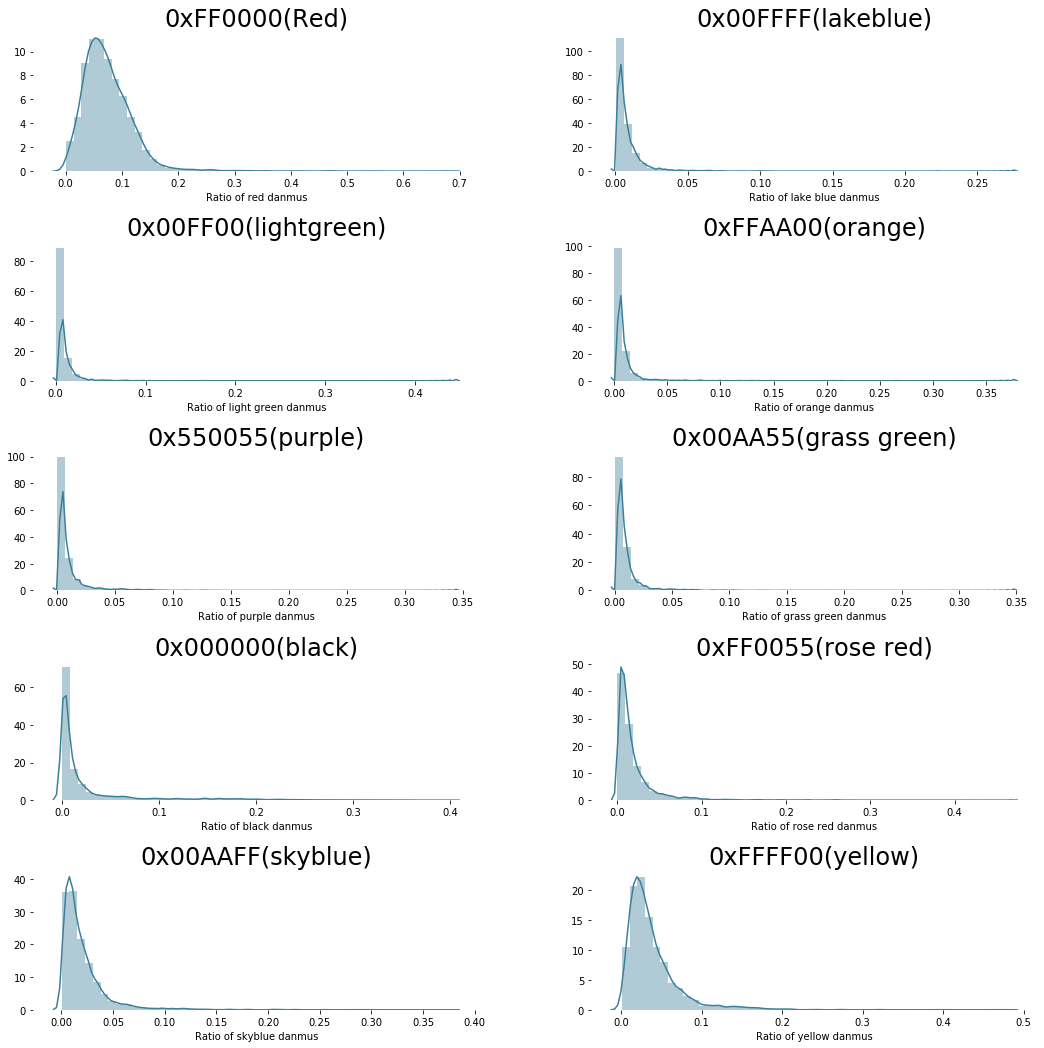

In [192]:
fig,ax= plt.subplots(figsize = (18,18))
grid = plt.GridSpec(5,2,wspace = 0.25,hspace = 0.5)
plt.subplot(grid[0,0])
sns.distplot(color_per[color_per.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('0xFF0000(Red)', fontsize=24)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,1])
sns.distplot(color_per[color_per.font_color_64 == '0x00FFFF']['values'],color='#3c7f99')
plt.xlabel('Ratio of lake blue danmus')
plt.title('0x00FFFF(lakeblue)', fontsize=24)
plt.box(False)

plt.subplot(grid[1,0])
sns.distplot(color_per[color_per.font_color_64 == '0x00FF00']['values'],color='#3c7f99')
plt.xlabel('Ratio of light green danmus')
plt.title('0x00FF00(lightgreen)', fontsize=24)
plt.box(False)

plt.subplot(grid[1,1])
sns.distplot(color_per[color_per.font_color_64 == '0xFFAA00']['values'],color='#3c7f99')
plt.xlabel('Ratio of orange danmus')
plt.title('0xFFAA00(orange)', fontsize=24)
plt.box(False)

plt.subplot(grid[2,0])
sns.distplot(color_per[color_per.font_color_64 == '0x550055']['values'],color='#3c7f99')
plt.xlabel('Ratio of purple danmus')
plt.title('0x550055(purple)', fontsize=24)
plt.box(False)

plt.subplot(grid[2,1])
sns.distplot(color_per[color_per.font_color_64 == '0x00AA55']['values'],color='#3c7f99')
plt.title('0x00AA55(grass green)', fontsize=24)
plt.xlabel('Ratio of grass green danmus')
plt.box(False)

plt.subplot(grid[3,0])
sns.distplot(color_per[color_per.font_color_64 == '0x000000']['values'], color='#3c7f99')
plt.title('0x000000(black)', fontsize=24)
plt.xlabel('Ratio of black danmus')
plt.box(False)

plt.subplot(grid[3,1])
sns.distplot(color_per[color_per.font_color_64 == '0xFF0055']['values'], color='#3c7f99')
plt.title('0xFF0055(rose red)', fontsize=24)
plt.xlabel('Ratio of rose red danmus')
plt.box(False)

plt.subplot(grid[4,0])
sns.distplot(color_per[color_per.font_color_64 == '0x00AAFF']['values'], color='#3c7f99')
plt.title('0x00AAFF(skyblue)', fontsize=24)
plt.xlabel('Ratio of skyblue danmus')
plt.box(False)

plt.subplot(grid[4,1])
sns.distplot(color_per[color_per.font_color_64 == '0xFFFF00']['values'], color='#3c7f99')
plt.title('0xFFFF00(yellow)', fontsize=24)
plt.xlabel('Ratio of yellow danmus')
plt.box(False)

### 2. Genre-specific

In [23]:
df_genre_color = df_colors_v[['category','video_id','font_color_64']]

In [24]:
colors = ['0xFF0000', '0x00FFFF', '0x00FF00', '0xFFAA00', '0x550055', '0x00AA55', '0x000000', '0xFF0055', '0x00AAFF', '0xFFFF00']

### 1. Dance

In [51]:
df_dance_color = df_genre_color[df_genre_color.category == 'dance'][['video_id','font_color_64']]
df_dance_color['values'] = np.ones(df_dance_color.shape[0])
df_dance_per = df_dance_color.groupby(['video_id','font_color_64']).sum()
df_dance_per = df_dance_per.reset_index()
sum_dance_color = df_dance_per.groupby('video_id').sum()
color_dance = df_dance_per[df_dance_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_dance_color
color_dance = color_dance.reset_index()
#color_dance[color_dance.font_color_64 == '0x00FFFF']['values']
#color_per[color_per.font_color_64 == '0x00FFFF']['values']

NameError: name 'color_show' is not defined

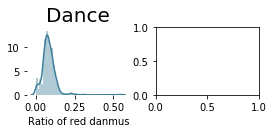

In [26]:
fig,ax= plt.subplots(figsize = (18,18))
grid = plt.GridSpec(10,8,wspace = 0.25,hspace = 0.5)

plt.subplot(grid[0,0])
sns.distplot(color_dance[color_dance.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Dance', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,1])
sns.distplot(color_show[color_show.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Show', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,2])
sns.distplot(color_music[color_music.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Music', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,3])
sns.distplot(color_play[color_play.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Play', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,4])
sns.distplot(color_sport[color_sport.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Sport', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,5])
sns.distplot(color_tech[color_tech.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Tech', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,6])
sns.distplot(color_bangumi[color_bangumi.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Bangumi', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

plt.subplot(grid[0,7])
sns.distplot(color_movie[color_movie.font_color_64 == '0xFF0000']['values'],color='#3c7f99')
plt.title('Movie', fontsize=20)
plt.xlabel('Ratio of red danmus')
plt.box(False)

In [189]:
def plot(color = '0xFF0000'):
    fig,ax= plt.subplots(figsize = (36,36))
    grid = plt.GridSpec(10,8,wspace = 0.25,hspace = 0.5)
    plt.subplot(grid[0,0])
    sns.distplot(color_dance[color_dance.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Dance', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,1])
    sns.distplot(color_show[color_show.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Show', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,2])
    sns.distplot(color_music[color_music.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Music', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,3])
    sns.distplot(color_play[color_play.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Play', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,4])
    sns.distplot(color_sport[color_sport.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Sport', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,5])
    sns.distplot(color_tech[color_tech.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Tech', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,6])
    sns.distplot(color_bangumi[color_bangumi.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Bangumi', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

    plt.subplot(grid[0,7])
    sns.distplot(color_movie[color_movie.font_color_64 == color]['values'],color='#3c7f99')
    plt.title('Movie', fontsize=24)
    plt.xlabel(color)
    plt.box(False)

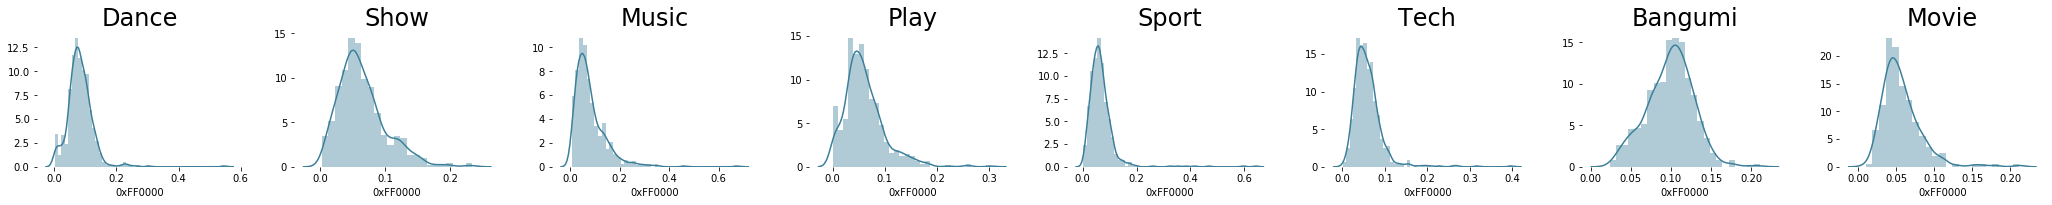

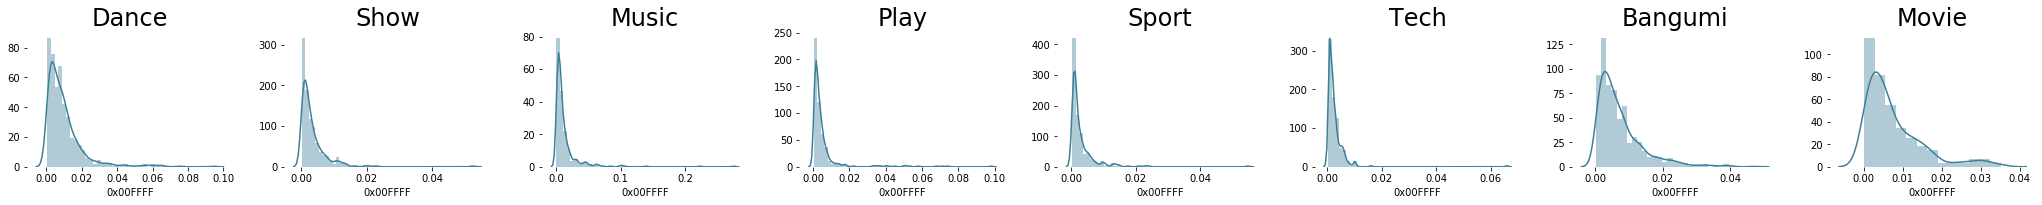

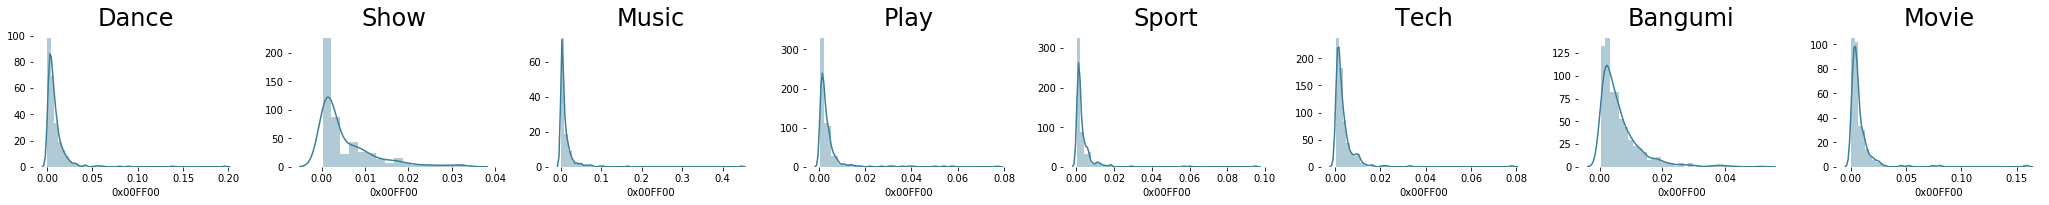

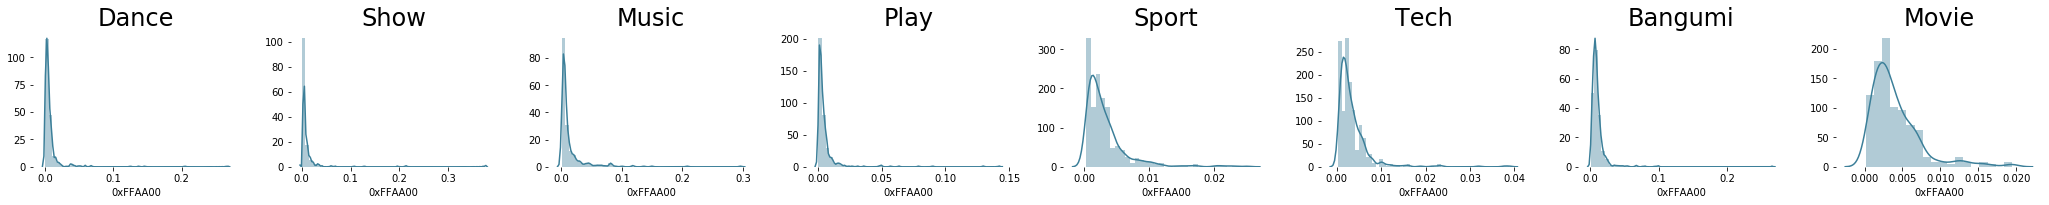

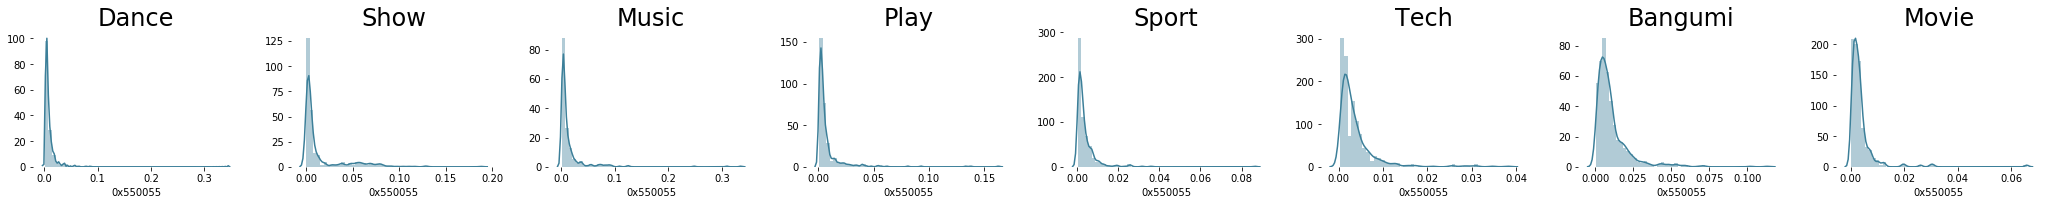

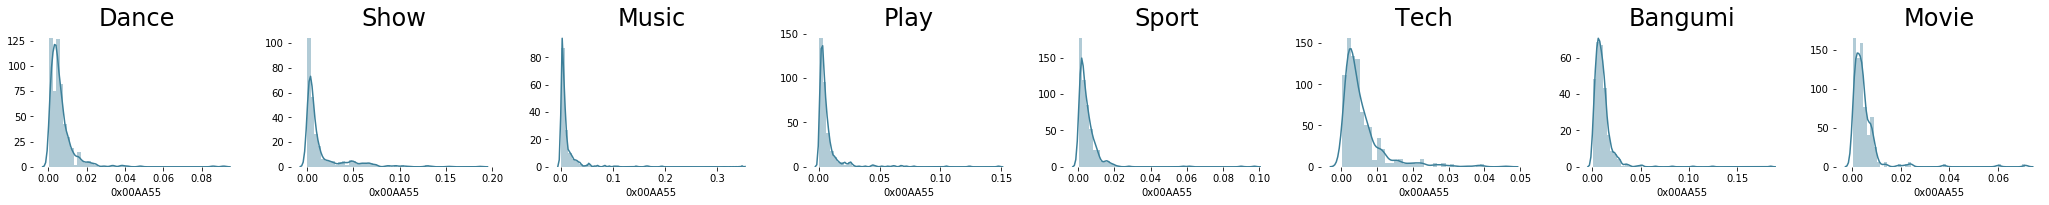

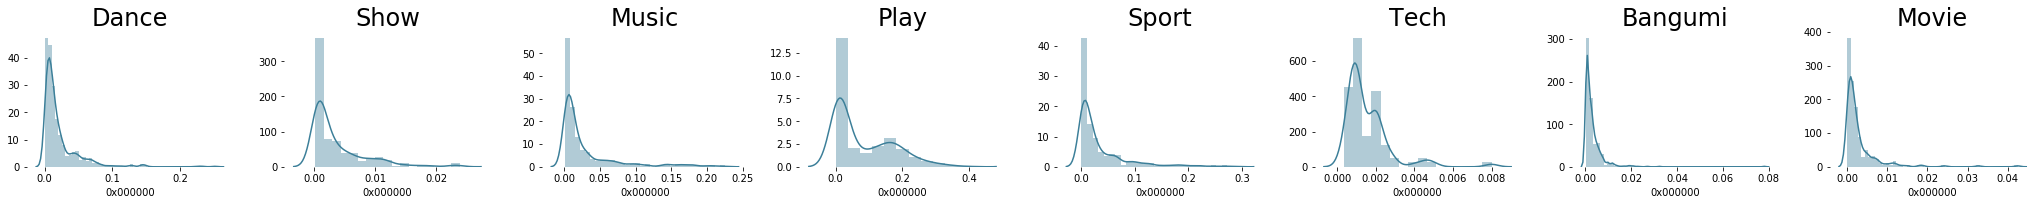

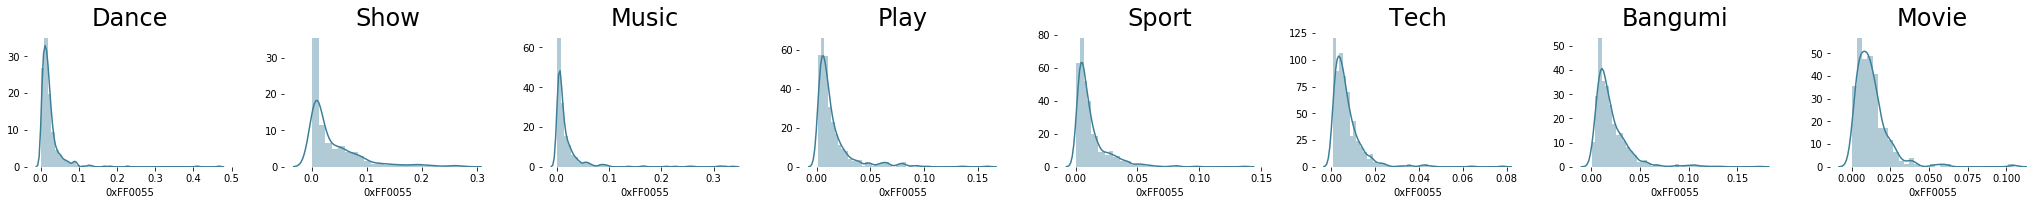

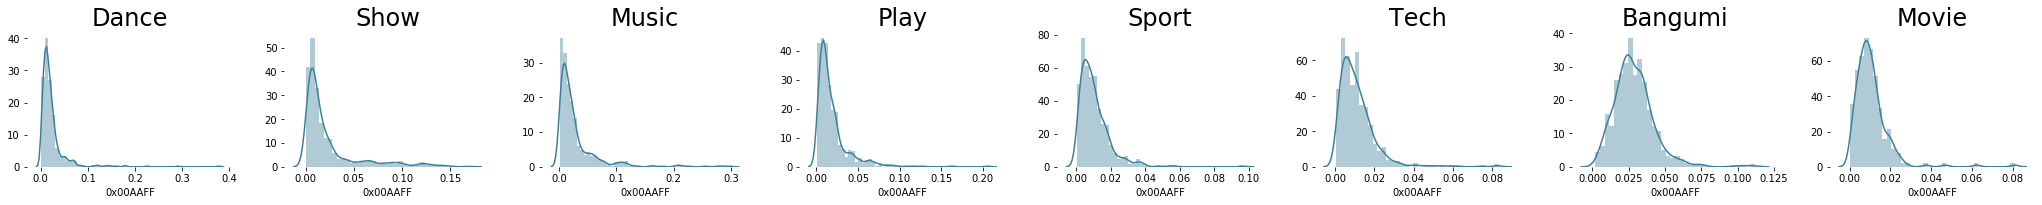

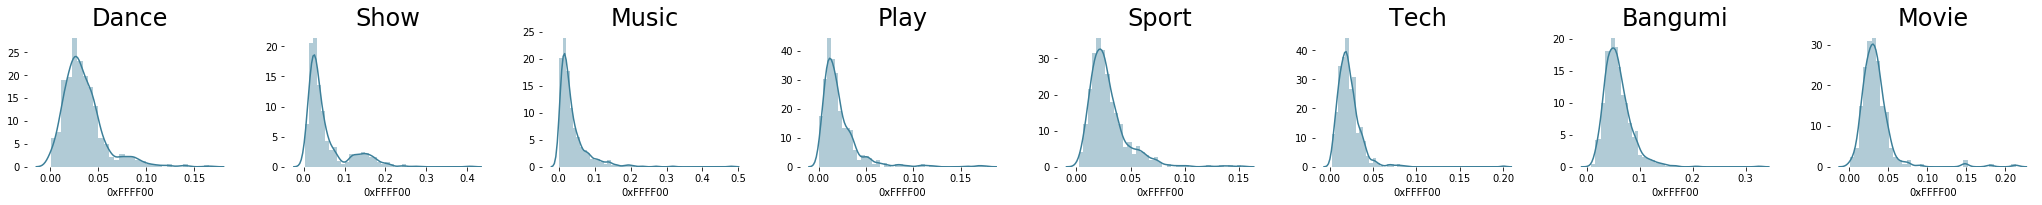

In [193]:
for color in colors:
    plot(color = color)
    plt.savefig('{}.png'.format(color))

### 2. Show

In [10]:
#color_dance[color_dance.font_color_64 == color]['values']

In [171]:
df_show_color = df_genre_color[df_genre_color.category == 'show'][['video_id','font_color_64']]
df_show_color['values'] = np.ones(df_show_color.shape[0])
df_show_per = df_show_color.groupby(['video_id','font_color_64']).sum()
df_show_per = df_show_per.reset_index()
sum_show_color = df_show_per.groupby('video_id').sum()
color_show = df_show_per[df_show_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_show_color
color_show = color_show.reset_index()

### 3. Music

In [172]:
df_music_color = df_genre_color[df_genre_color.category == 'music'][['video_id','font_color_64']]
df_music_color['values'] = np.ones(df_music_color.shape[0])
df_music_per = df_music_color.groupby(['video_id','font_color_64']).sum()
df_music_per = df_music_per.reset_index()
sum_music_color = df_music_per.groupby('video_id').sum()
color_music = df_music_per[df_music_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_music_color
color_music = color_music.reset_index()

### 4. Play

In [176]:
df_play_color = df_genre_color[df_genre_color.category == 'play'][['video_id','font_color_64']]
df_play_color['values'] = np.ones(df_play_color.shape[0])
df_play_per = df_play_color.groupby(['video_id','font_color_64']).sum()
df_play_per = df_play_per.reset_index()
sum_play_color = df_play_per.groupby('video_id').sum()
color_play = df_play_per[df_play_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_play_color
color_play = color_play.reset_index()

### 5. Sport

In [177]:
df_sport_color = df_genre_color[df_genre_color.category == 'sport'][['video_id','font_color_64']]
df_sport_color['values'] = np.ones(df_sport_color.shape[0])
df_sport_per = df_sport_color.groupby(['video_id','font_color_64']).sum()
df_sport_per = df_sport_per.reset_index()
sum_sport_color = df_sport_per.groupby('video_id').sum()
color_sport = df_sport_per[df_sport_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_sport_color
color_sport = color_sport.reset_index()

### 6. Tech

In [178]:
df_tech_color = df_genre_color[df_genre_color.category == 'tech'][['video_id','font_color_64']]
df_tech_color['values'] = np.ones(df_tech_color.shape[0])
df_tech_per = df_tech_color.groupby(['video_id','font_color_64']).sum()
df_tech_per = df_tech_per.reset_index()
sum_tech_color = df_tech_per.groupby('video_id').sum()
color_tech = df_tech_per[df_tech_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_tech_color
color_tech = color_tech.reset_index()

### 7. Bangumi

In [179]:
df_bangumi_color = df_genre_color[df_genre_color.category == 'bangumi'][['video_id','font_color_64']]
df_bangumi_color['values'] = np.ones(df_bangumi_color.shape[0])
df_bangumi_per = df_bangumi_color.groupby(['video_id','font_color_64']).sum()
df_bangumi_per = df_bangumi_per.reset_index()
sum_bangumi_color = df_bangumi_per.groupby('video_id').sum()
color_bangumi = df_bangumi_per[df_bangumi_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_bangumi_color
color_bangumi = color_bangumi.reset_index()

### 8. Movie

In [180]:
df_movie_color = df_genre_color[df_genre_color.category == 'movie'][['video_id','font_color_64']]
df_movie_color['values'] = np.ones(df_movie_color.shape[0])
df_movie_per = df_movie_color.groupby(['video_id','font_color_64']).sum()
df_movie_per = df_movie_per.reset_index()
sum_movie_color = df_movie_per.groupby('video_id').sum()
color_movie = df_movie_per[df_movie_per.font_color_64.isin(colors)].groupby(['video_id','font_color_64']).sum()/sum_movie_color
color_movie = color_movie.reset_index()

In [ ]:
# 8x10 横纵坐标

## Time Location

In [ ]:
#accumulation

### 1. Overall

In [349]:
## Distribution of when a colorful Danmu appears in a video (time-location): 1) overall: 2) genre-specific. Only for videos with colorful Danmus

In [297]:
df_colorful = df[df.font_color_64 != '0xFFFFFF']

In [4]:
colors = ['0xFF0000', '0x00FFFF', '0x00FF00', '0xFFAA00', '0x550055', '0x00AA55', '0x000000', '0xFF0055', '0x00AAFF', '0xFFFF00']

In [22]:
#colors_pie = ['0xff0000', '0x00ffff', '0x00ff00', '0xffaa00', '0x550055', '0x00aa55', '0x000000', '0xff0055', '0x00aaff', '0xffff00']

In [15]:
df_colorful.shape

(1920218, 13)

In [16]:
dance_colorful = df_colorful[df_colorful.category == 'dance']
show_colorful = df_colorful[df_colorful.category == 'show']
music_colorful = df_colorful[df_colorful.category == 'music']
play_colorful = df_colorful[df_colorful.category == 'play']
sport_colorful = df_colorful[df_colorful.category == 'sport']
tech_colorful = df_colorful[df_colorful.category == 'tech']
bangumi_colorful = df_colorful[df_colorful.category == 'bangumi']
movie_colorful = df_colorful[df_colorful.category == 'movie']

In [7]:
color_array = []
for color in colors:
    color_array.append(df_colorful[df_colorful.font_color_64 ==color].count()[0])

In [8]:
colors = ['#FF0000', '#00FFFF', '#00FF00', '#FFAA00', '#550055', '#00AA55', '#000000', '#FF0055', '#00AAFF', '#FFFF00']
colors_name = ['red','lakeblue','lightgreen','orange',
              'purple','grassgreen','black','rosered','skyblue','yellow']

In [9]:
color_array

[577523, 42369, 44444, 54980, 67809, 71375, 93919, 154681, 161434, 336714]

In [11]:
#93919/np.sum(color_array)

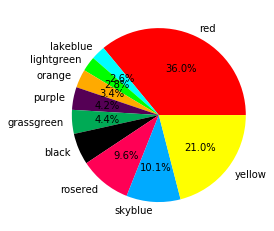

<Figure size 864x864 with 0 Axes>

In [99]:
fig1, ax1 = plt.subplots()
fig1 = plt.figure(figsize=(12,12))
ax1.pie(color_array,colors = colors,labels = colors_name,autopct='%1.1f%%')
plt.show()

In [28]:
dance_color_array = []
for color in colors:
    dance_color_array.append(dance_colorful[dance_colorful.font_color_64 ==color].count()[0])
show_color_array = []
for color in colors:
    show_color_array.append(show_colorful[show_colorful.font_color_64 ==color].count()[0])
music_color_array = []
for color in colors:
    music_color_array.append(music_colorful[music_colorful.font_color_64 ==color].count()[0])
play_color_array = []
for color in colors:
    play_color_array.append(play_colorful[play_colorful.font_color_64 ==color].count()[0])
sport_color_array = []
for color in colors:
    sport_color_array.append(sport_colorful[sport_colorful.font_color_64 ==color].count()[0])
tech_color_array = []
for color in colors:
    tech_color_array.append(tech_colorful[tech_colorful.font_color_64 ==color].count()[0])
bangumi_color_array = []
for color in colors:
    bangumi_color_array.append(bangumi_colorful[bangumi_colorful.font_color_64 ==color].count()[0])
movie_color_array = []
for color in colors:
    movie_color_array.append(movie_colorful[movie_colorful.font_color_64 ==color].count()[0])

In [29]:
category = list(pd.unique(df.category))
category_array = [dance_color_array,show_color_array,music_color_array,play_color_array,
                  sport_color_array,tech_color_array,bangumi_color_array,movie_color_array]

In [7]:
#ddddplt.pie(dance_color_array)
#plt.title('Dance')
#plt.show()

Text(0.5, 1.0, 'Movie')

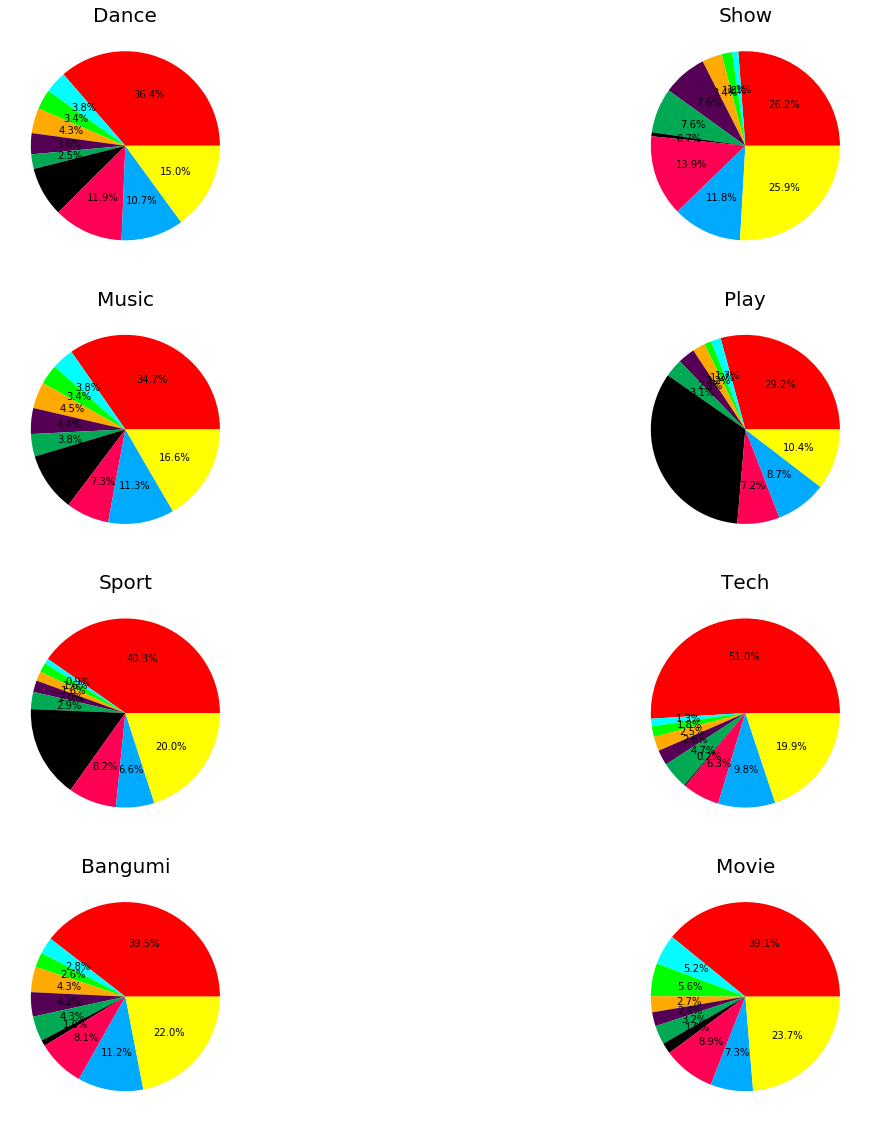

In [69]:
fig,ax = plt.subplots(figsize = (20,20))
grid = plt.GridSpec(4,2,wspace = 0.25,hspace = 0.2)

plt.subplot(grid[0,0])
plt.pie(dance_color_array,colors = colors,autopct="%.1f%%")
plt.title('Dance',fontsize = 20)

plt.subplot(grid[0,1])
plt.pie(show_color_array,colors = colors,autopct="%.1f%%")
plt.title('Show',fontsize = 20)

plt.subplot(grid[1,0])
plt.pie(music_color_array,colors = colors,autopct="%.1f%%")
plt.title('Music',fontsize = 20)

plt.subplot(grid[1,1])
plt.pie(play_color_array,colors = colors,autopct="%.1f%%")
plt.title('Play',fontsize = 20)

plt.subplot(grid[2,0])
plt.pie(sport_color_array,colors = colors,autopct="%.1f%%")
plt.title('Sport',fontsize = 20)

plt.subplot(grid[2,1])
plt.pie(tech_color_array,colors = colors,autopct="%.1f%%")
plt.title('Tech',fontsize = 20)

plt.subplot(grid[3,0])
plt.pie(bangumi_color_array,colors = colors,autopct="%.1f%%")
plt.title('Bangumi',fontsize = 20)

plt.subplot(grid[3,1])
plt.pie(movie_color_array,colors = colors,autopct="%.1f%%")
plt.title('Movie',fontsize = 20)


In [17]:
colorful_video = pd.unique(df_colorful.video_id)

In [18]:
colorful_video.shape

(4409,)

In [12]:
df_color = df[df.video_id.isin(colorful_video)]

In [13]:
#df_time = df_colorful[df_colorful.time != -2147483.648]
df_color.shape

(7900635, 13)

### Colorful danmus statistics

In [58]:
df_colorful = df[df.font_color_64 != '0xFFFFFF']

In [59]:
unique_time = list(pd.unique(df_colorful.time))
sorted(unique_time)[-5:]

[99451.0, 233154.0, 487160.0, 2147483.647, 3284110.0]

In [60]:
len(unique_time)

1219517

In [298]:
video_pd.head()

,category,video_id,title,desc,duration,pubdate,favorite,coin,view,share
0,sport,10005612,【许昕】【张宇镇】11-0零封完整版 2015年国际乒联世界巡回赛总决赛,https://www.youtube.com/watch?v=iqzwJ7LwOlk\n【...,1373,1492823558,1281,114,110734,180
0,music,1002003,那些年在电视台播出时进行过较大改动的OP、ED,二次创作 电视台播出时一些动画的片头片尾进行过改动，这里是改动较大的几部，本视频把原版和内地...,1571,1394348274,1282,100,56242,57
0,play,10025115,[白衣少侠]核爆神曲 Penbeat aLIEz,希望大家喜欢，对理解我的朋友们表示真心的感谢...,298,1492872098,12344,19645,386245,6024
0,play,10027337,【东方】风神录串烧 Part1【交响ActiveNEETs】,我是来自niconico的 红流星 \n微博@5333606660 \n\n交响アクティブN...,629,1492878164,9472,9108,110905,1386
0,sport,10044535,【羽生结弦】2017WTT finale 170423,youtube\nsee you next season!!!rock star上身的疯鹅子。,890,1492942055,9991,466,152231,1017


In [299]:
df_colorful.head(1)

,_id,category,video_id,time,timestamp,font_color,font_color_64,font_size,mode,text,text_trans,user_id_hash,pool
10,5b56b92c8b976b7697e3b015,dance,6683560,77.96,1476518642,0x99FFFF,0xAAFFFF,25,5,前方换装预警,There's a change warning ahead,7ed82d51,0


In [300]:
df_colorful.shape

(1920214, 13)

In [304]:
df_color_64 = df_colorful[['category','video_id','time','font_color_64']]
df_location = df_color_64.merge(video_pd,on = ['video_id','category'])
df_location['time_percent'] = df_location['time']/df_location['duration']

In [305]:
df_location.shape

(1920214, 13)

In [307]:
df_location.head(1)

,category,video_id,time,font_color_64,title,desc,duration,pubdate,favorite,coin,view,share,time_percent
0,dance,6683560,77.96,0xAAFFFF,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724,0.322149


In [313]:
def get_percentile(num):
    ""
    if num<=0.25:
        return '25%'
    if num <= 0.5:
        return '50%'
    if num <= 0.75:
        return '75%'
    else:
        return '100%'

In [314]:
df_location['percentile'] = df_location['time_percent'].apply(get_percentile)
df_location.head(1)

,category,video_id,time,font_color_64,title,desc,duration,pubdate,favorite,coin,view,share,time_percent,percentile
0,dance,6683560,77.96,0xAAFFFF,【咬人猫】坚定的Eye❤o(*≧▽≦)ツ,坚定的Eye刚出就很喜欢，偶然看到一个视在我的世界里用Saber模型跳这支舞的视频（找了很久...,242,1476516102,102012,155518,4113478,10724,0.322149,50%


In [320]:
#Overall
df_timelocation = df_location[['video_id','percentile']]
df_timelocation['value'] = 1
df_overall_location = df_timelocation.groupby(['video_id','percentile']).count().reset_index()
sum_overall = df_overall_location.groupby('video_id').sum().reset_index()
df_percentage = df_overall_location.merge(sum_overall,on = 'video_id')
df_percentage['percentage'] = df_percentage['value_x']/df_percentage['value_y']
per_color_df = df_percentage[['video_id','percentile','percentage']]
df_merge_pivot = per_color_df.pivot(index = 'video_id',columns = 'percentile',values = 'percentage').fillna(0)
overall_per = list(df_merge_pivot.sum(axis = 0)/4409)
overall_pd = pd.DataFrame(overall_per,index = ['25%','50%','75%','100%'])
overall_pd.columns = ['percentage']
overall_pd['cumulative_per'] = np.cumsum(overall_per)
overall_pd

,percentage,cumulative_per
25%,0.211562,0.211562
50%,0.314074,0.525636
75%,0.251086,0.776722
100%,0.223278,1.000000


In [341]:
def get_statistics(category):
    
    df_loc = df_location[df_location['category'] == category]
    df_timelocation = df_loc[['video_id','percentile']]
    df_timelocation['value'] = 1
    df_overall_location = df_timelocation.groupby(['video_id','percentile']).count().reset_index()
    sum_overall = df_overall_location.groupby('video_id').sum().reset_index()
    df_percentage = df_overall_location.merge(sum_overall,on = 'video_id')
    df_percentage['percentage'] = df_percentage['value_x']/df_percentage['value_y']
    per_color_df = df_percentage[['video_id','percentile','percentage']]
    df_merge_pivot = per_color_df.pivot(index = 'video_id',columns = 'percentile',values = 'percentage').fillna(0)
    video_num = df_merge_pivot.shape[0]
    overall_per = list(df_merge_pivot.sum(axis = 0)/video_num)
    overall_pd = pd.DataFrame(overall_per,index = ['25%','50%','75%','100%'])
    overall_pd.columns = [category]
    
    return overall_pd

In [342]:
dance_statistics = get_statistics('dance')
show_statistics = get_statistics('show')
music_statistics = get_statistics('music')
play_statistics = get_statistics('play')
sport_statistics = get_statistics('sport')
tech_statistics = get_statistics('tech')
bangumi_statistics = get_statistics('bangumi')
movie_statistics = get_statistics('movie')

In [345]:
dance_statistics['show'] = show_statistics
dance_statistics['music'] = music_statistics
dance_statistics['play'] = play_statistics
dance_statistics['sport'] = sport_statistics
dance_statistics['tech'] = tech_statistics
dance_statistics['bangumi'] = bangumi_statistics
dance_statistics['movie'] = movie_statistics
dance_statistics

,dance,show,music,play,sport,tech,bangumi,movie
25%,0.182871,0.234219,0.187723,0.157106,0.213079,0.230599,0.253893,0.233023
50%,0.356634,0.283804,0.338739,0.355783,0.321097,0.303939,0.251458,0.331413
75%,0.260615,0.237076,0.262673,0.282897,0.243056,0.235065,0.245455,0.228748
100%,0.199880,0.244901,0.210866,0.204214,0.222768,0.230397,0.249194,0.206817


,percentage,cumulative_per
25%,0.234219,0.234219
50%,0.283804,0.518023
75%,0.237076,0.755099
100%,0.244901,1.000000


In [326]:
music_statistics

,percentage,cumulative_per
25%,0.187723,0.187723
50%,0.338739,0.526462
75%,0.262673,0.789134
100%,0.210866,1.000000


In [327]:
play_statistics

,percentage,cumulative_per
25%,0.157106,0.157106
50%,0.355783,0.512889
75%,0.282897,0.795786
100%,0.204214,1.000000


In [328]:
sport_statistics

,percentage,cumulative_per
25%,0.213079,0.213079
50%,0.321097,0.534176
75%,0.243056,0.777232
100%,0.222768,1.000000


In [329]:
tech_statistics

,percentage,cumulative_per
25%,0.230599,0.230599
50%,0.303939,0.534538
75%,0.235065,0.769603
100%,0.230397,1.000000


In [78]:
df_colorful.percentile.value_counts()

1    719198
3    453292
2    397356
4    350368
Name: percentile, dtype: int64

In [330]:
bangumi_statistics

,percentage,cumulative_per
25%,0.253893,0.253893
50%,0.251458,0.505351
75%,0.245455,0.750806
100%,0.249194,1.000000


In [331]:
movie_statistics

,percentage,cumulative_per
25%,0.233023,0.233023
50%,0.331413,0.564435
75%,0.228748,0.793183
100%,0.206817,1.000000


In [30]:
#df_time = df_color[df_color.font_color_64 != '0xFFFFFF']
#df_overall_time = df_colorful[['video_id','percentile']]
#df_overall_time['value'] = np.ones(df_colorful.shape[0])
#df_overall_colorful = df_overall_time.groupby(['video_id','percentile']).sum().reset_index()

In [31]:
#df_overall_colorful.head(10)

In [13]:
#df_time.shape

In [36]:
#df_time

In [79]:
#df_time = df_color[df_color.font_color_64 != '0xFFFFFF']
df_over_time = df_colorful[['video_id','percentile']]
df_over_time['value'] = np.ones(df_colorful.shape[0])
df_over_colorful = df_over_time.groupby(['video_id','percentile']).sum().reset_index()

In [80]:
df_over_colorful.head(10)

,video_id,percentile,value
0,4442,1,191.0
1,4442,2,105.0
2,4442,3,530.0
3,4443,1,129.0
4,4443,2,227.0
5,4443,3,399.0
6,4444,1,194.0
7,4444,2,348.0
8,4444,3,269.0
9,4445,1,219.0


In [81]:
sum_color =df_over_colorful.groupby('video_id').sum().reset_index()
all_color_df = df_over_colorful.merge(sum_color,on = 'video_id',how = 'left')
all_color_df.columns = ['video_id','percentile','colorful_danmus','all_percentile','sum']
all_color_df['percentage'] = all_color_df['colorful_danmus']/all_color_df['sum']
all_color_df.head()

,video_id,percentile,colorful_danmus,all_percentile,sum,percentage
0,4442,1,191.0,6,826.0,0.231235
1,4442,2,105.0,6,826.0,0.127119
2,4442,3,530.0,6,826.0,0.641646
3,4443,1,129.0,6,755.0,0.170861
4,4443,2,227.0,6,755.0,0.300662


In [40]:
#merge_all = df_overall_colorful.merge(df_over_colorful,on = ['video_id','percentile'],how = 'left',indicator = True)
#merge = merge_all.iloc[:,:-1]
#merge_df = merge.fillna(0)
#merge_df['colorful_ratio'] = merge_df['value_y']/merge_df['value_x']
#merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#merge_df.head(9)

In [41]:
#color_df = merge_df[['video_id','percentile','colorful_danmus']]

In [82]:
per_color_df = all_color_df[['video_id','percentile','percentage']]

In [84]:
df_merge_pivot = per_color_df.pivot(index = 'video_id',columns = 'percentile',values = 'percentage').fillna(0)
df_merge_pivot.head()

percentile,1,2,3,4
video_id,,,,
4442,0.231235,0.127119,0.641646,0.0
4443,0.170861,0.300662,0.528477,0.0
4444,0.239211,0.429100,0.331689,0.0
4445,0.283679,0.348446,0.367876,0.0
4446,0.159712,0.200000,0.640288,0.0


In [85]:
#lack4_video = list(per_color_df_sum[per_color_df_sum['percentile'] == 6].video_id)
#percentile_4 = np.ones(len(lack4_video)) * 4
#percentile_4_int = percentile_4.astype('int64')
#percentage_4 = np.zeros(len(lack4_video))
#lack4_video_df = pd.DataFrame(np.c_[lack4_video,percentile_4_int,percentage_4])
#lack4_video_df.columns = ['video_id','percentile','percentage']
#frames_4 = [per_color_df,lack4_video_df]
#df_4 = pd.concat(frames_4)

In [86]:
#lack34_video = list(per_color_df_sum[per_color_df_sum['percentile'] == 3].video_id)
#percentile_34 = np.ones(len(lack34_video)) * 4
#percentile_34_int = percentile_34.astype('int64')
#percentile_3 = np.ones(len(lack34_video)) * 3
#percentile_3_int = percentile_3.astype('int64')
#percentage_34 = np.zeros(len(lack34_video))
#lack34_video_df = pd.DataFrame(np.c_[lack34_video,percentile_34_int,percentage_34])
#lack34_video_df.columns = ['video_id','percentile','percentage']
#lack3_video_df = pd.DataFrame(np.c_[lack34_video,percentile_3_int,percentage_34])
#lack3_video_df.columns = ['video_id','percentile','percentage']
#frames_34 = [per_color_df,lack34_video_df,lack3_video_df,lack4_video_df]
#df_3 = pd.concat(frames_34)
#df_3.shape

In [87]:
#len(pd.unique(df_3.video_id))

In [88]:
#df3_merge_pivot = df_3.pivot(index = 'video_id',columns = 'percentile',values = 'percentage')
#df3_merge_pivot.head()

In [89]:
overall_per = list(df_merge_pivot.sum(axis = 0)/4409)
overall_pd = pd.DataFrame(overall_per,index = ['25%','50%','75%','100%'])
overall_pd.columns = ['percentage']
overall_pd['cumulative_per'] = np.cumsum(overall_per)
overall_pd

,percentage,cumulative_per
25%,0.601132,0.601132
50%,0.205262,0.806395
75%,0.126913,0.933307
100%,0.066693,1.000000


In [400]:
#df_overall_colorful_pivot = df_overall_colorful.pivot(index = 'video_id',columns = 'percentile',values = 'value').fillna(0)
#df_overall_colorful_pivot['sum'] = df_overall_colorful_pivot.iloc[:,0:10].sum(axis= 1)
#df_overall_colorful_percent = df_overall_colorful_pivot.copy()
#df_overall_colorful_percent.iloc[:,0] = df_overall_colorful_percent.iloc[:,0]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,1] = df_overall_colorful_percent.iloc[:,1]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,2] = df_overall_colorful_percent.iloc[:,2]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,3] = df_overall_colorful_percent.iloc[:,3]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,4] = df_overall_colorful_percent.iloc[:,4]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,5] = df_overall_colorful_percent.iloc[:,5]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,6] = df_overall_colorful_percent.iloc[:,6]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,8] = df_overall_colorful_percent.iloc[:,8]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.iloc[:,9] = df_overall_colorful_percent.iloc[:,9]/df_overall_colorful_percent.iloc[:,10]
#df_overall_colorful_percent.head()

In [90]:
#df_overall_colorful_percent.shape

In [91]:
#df_overall = df_overall_colorful_percent.iloc[:,:-1]
#df_overall.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [92]:
#df_merge_pivot.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [242]:
#for location in time_location:
    #sns.distplot(df_overall[location])
    #plt.show()

### 2. Genre_specific

### 1. Dance

In [141]:
dance_color = df_colorful[df_colorful.category == 'dance']
unique_dance_time = list(pd.unique(dance_color.time))
dance_list = []
for i in range(25,100,25):
    dance_list.append(np.percentile(unique_dance_time, i))
dance_color_pd = dance_color[['video_id','time','font_color_64']]

In [142]:
def transform_quan(time,percentile = dance_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [143]:
dance_color_pd['percentile'] = dance_color_pd.time.apply(transform_quan)
dance_all_pd = dance_color_pd[['video_id','percentile']]
dance_all_pd['value'] = np.ones(dance_color_pd.shape[0])
dance_all_df = dance_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [144]:
len(pd.unique(dance_all_df.video_id))

589

In [145]:
dance_color_df_sum = dance_all_df.groupby('video_id').sum().reset_index()
sum_df_dance = dance_color_df_sum[['video_id','value']]
dance_percentage = dance_all_df.merge(sum_df_dance,on = 'video_id',how = 'left')
dance_percentage['percentage'] = dance_percentage['value_x']/dance_percentage['value_y']
dance_percent = dance_percentage[['video_id','percentile','percentage']]
dance_merge_pivot = dance_percent.pivot(index = 'video_id',columns = 'percentile',values = 'percentage').fillna(0)
dance_merge_pivot.head()

percentile,1,2,3,4
video_id,,,,
176924,0.371041,0.280543,0.348416,0.000000
204676,0.375776,0.313665,0.310559,0.000000
223999,0.291925,0.161491,0.273292,0.273292
227625,0.708609,0.291391,0.000000,0.000000
240452,0.649123,0.350877,0.000000,0.000000


In [146]:
dance_per = list(dance_merge_pivot.sum(axis = 0)/len(pd.unique(dance_all_df.video_id)))
dance_pd = pd.DataFrame(dance_per,index = ['25%','50%','75%','100%'])
dance_pd.columns = ['percentage']
dance_pd['cumulative_per'] = np.cumsum(dance_per)
dance_pd['genre'] = 'dance'
dance_pd

,percentage,cumulative_per,genre
25%,0.375131,0.375131,dance
50%,0.308804,0.683935,dance
75%,0.241810,0.925745,dance
100%,0.074255,1.000000,dance


In [147]:
def get_stats(all_df):
    color_df_sum = all_df.groupby('video_id').sum().reset_index()
    sum_df = color_df_sum[['video_id','value']]
    percentage = all_df.merge(sum_df,on = 'video_id',how = 'left')
    percentage['percentage'] = percentage['value_x']/percentage['value_y']
    percent = percentage[['video_id','percentile','percentage']]
    merge_pivot = percent.pivot(index = 'video_id',columns = 'percentile',values = 'percentage').fillna(0)
    per = list(merge_pivot.sum(axis = 0)/len(pd.unique(all_df.video_id)))
    pd_df = pd.DataFrame(per,index = ['25%','50%','75%','100%'])
    pd_df.columns = ['percentage']
    pd_df['cumulative_per'] = np.cumsum(per)
    return pd_df

In [160]:
#genre_frames = [dance_pd,show_pd,music_pd,play_pd,sport_pd,tech_pd,bangumi_pd,movie_pd]
#genre_pd = pd.concat(genre_frames)
#genre_pd.transpose().to_csv('genre_pd.csv')

In [161]:
#genre_pd = pd.read_csv('genre_pd.csv')#@genre_pd 

In [73]:
df_colors_64 = df[df.font_color_64.isin(colors)]
df_colors_64.font_color_64.value_counts()

0xFF0000    577523
0xFFFF00    336714
0x00AAFF    161434
0xFF0055    154681
0x000000     93919
0x00AA55     71375
0x550055     67809
0xFFAA00     54980
0x00FF00     44444
0x00FFFF     42369
Name: font_color_64, dtype: int64

In [75]:
#dance_colorful = dance_color_pd[dance_color_pd.font_color_64 !='0xFFFFFF']
#dance_colorful_pd = dance_colorful[['video_id','percentile']]
#dance_colorful_pd['value'] = np.ones(dance_colorful_pd.shape[0])
#dance_colorful_df = dance_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [456]:
#dance_colorful_df.head()

In [76]:
#dance_merge_all = dance_all_df.merge(dance_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#dance_merge = dance_merge_all.iloc[:,:-1]
#dance_merge_df = dance_merge.fillna(0)
#dance_merge_df['colorful_ratio'] = dance_merge_df['value_y']/dance_merge_df['value_x']
#dance_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#dance_merge_df.head()

In [77]:
#dance_df_merge = dance_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#dance_df_merge_pivot = dance_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#dance_df_merge_pivot.head()

In [234]:
#df_dance = dance_df_pivot_percent.iloc[:,:-1]
#df_dance.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [78]:
#dance_df_merge_pivot.shape

In [282]:
#for location in dance_time_location:
    #sns.distplot(df_dance[location])
    #plt.show()

### 2. Show

In [148]:
show_color = df_colorful[df_colorful.category == 'show']
unique_show_time = list(pd.unique(show_color.time))

In [149]:
show_list = []
for i in range(25,100,25):
    show_list.append(np.percentile(unique_show_time, i))

In [150]:
def transform_quan(time,percentile = show_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [151]:
show_color_pd = show_color[['video_id','time','font_color_64']]
show_color_pd['percentile'] = show_color_pd.time.apply(transform_quan)
show_all_pd = show_color_pd[['video_id','percentile']]
show_all_pd['value'] = np.ones(show_color_pd.shape[0])
show_all_df = show_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [152]:
#show_colorful = show_color_pd[show_color_pd.font_color_64 !='0xFFFFFF']
#show_colorful_pd = show_colorful[['video_id','percentile']]
#show_colorful_pd['value'] = np.ones(show_colorful_pd.shape[0])
#show_colorful_df = show_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [153]:
#show_merge_all = show_all_df.merge(show_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#show_merge = show_merge_all.iloc[:,:-1]
#show_merge_df = show_merge.fillna(0)
#show_merge_df['colorful_ratio'] = show_merge_df['value_y']/show_merge_df['value_x']
#show_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#show_merge_df.head()

In [154]:
#show_df_merge = show_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#show_df_merge_pivot = show_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#show_df_merge_pivot.head()

In [155]:
#show_df_merge_pivot.shape

In [156]:
#df_show = show_df_pivot_percent.iloc[:,:-1]
#df_show.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#show_time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [157]:
#for location in show_time_location:
    #sns.distplot(df_show[location])
    #plt.show()

### 3. Music

In [159]:
music_color = df_colorful[df_colorful.category == 'music']
unique_music_time = list(pd.unique(music_color.time))

In [160]:
music_list = []
for i in range(25,100,25):
    music_list.append(np.percentile(unique_music_time, i))

In [161]:
def transform_quan(time,percentile = music_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [162]:
music_color_pd = music_color[['video_id','time','font_color_64']]
music_color_pd['percentile'] = music_color_pd.time.apply(transform_quan)
music_all_pd = music_color_pd[['video_id','percentile']]
music_all_pd['value'] = np.ones(music_color_pd.shape[0])
music_all_df = music_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [163]:
#music_colorful = music_color_pd[music_color_pd.font_color_64 !='0xFFFFFF']
#music_colorful_pd = music_colorful[['video_id','percentile']]
#music_colorful_pd['value'] = np.ones(music_colorful_pd.shape[0])
#music_colorful_df = music_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [164]:
#music_merge_all = music_all_df.merge(music_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#music_merge = music_merge_all.iloc[:,:-1]
#music_merge_df = music_merge.fillna(0)
#music_merge_df['colorful_ratio'] = music_merge_df['value_y']/music_merge_df['value_x']
#music_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#music_merge_df.head()

In [165]:
#music_df_merge = music_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#music_df_merge_pivot = music_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#music_df_merge_pivot.head()

In [166]:
#df_music = music_df_pivot_percent.iloc[:,:-1]
#df_music.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#music_time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [167]:
#for location in music_time_location:
    #sns.distplot(df_music[location])
    #plt.show()

### 4. Play

In [168]:
play_color = df_colorful[df_colorful.category == 'play']
unique_play_time = list(pd.unique(play_color.time))
play_list = []
for i in range(25,100,25):
    play_list.append(np.percentile(unique_play_time, i))

In [169]:
def transform_quan(time,percentile = play_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [170]:
play_color_pd = play_color[['video_id','time','font_color_64']]
play_color_pd['percentile'] = play_color_pd.time.apply(transform_quan)
play_all_pd = play_color_pd[['video_id','percentile']]
play_all_pd['value'] = np.ones(play_color_pd.shape[0])
play_all_df = play_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [171]:
#play_colorful = play_color_pd[play_color_pd.font_color_64 !='0xFFFFFF']
#play_colorful_pd = play_colorful[['video_id','percentile']]
#play_colorful_pd['value'] = np.ones(play_colorful_pd.shape[0])
#play_colorful_df = play_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [172]:
#play_merge_all = play_all_df.merge(play_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#play_merge = play_merge_all.iloc[:,:-1]
#play_merge_df = play_merge.fillna(0)
#play_merge_df['colorful_ratio'] = play_merge_df['value_y']/play_merge_df['value_x']
#play_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#play_merge_df.head()

In [173]:
#play_df_merge = play_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#play_df_merge_pivot = play_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#play_df_merge_pivot.head()

In [174]:
#df_play = play_df_pivot_percent.iloc[:,:-1]
#df_play.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#music_time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']

In [175]:
#for location in time_location:
    #sns.distplot(df_play[location])
    #plt.show()

### 5. Sport

In [176]:
sport_color = df_colorful[df_colorful.category == 'sport']
unique_sport_time = list(pd.unique(sport_color.time))
sport_list = []
for i in range(25,100,25):
    sport_list.append(np.percentile(unique_sport_time, i))

In [177]:
def transform_quan(time,percentile = sport_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [178]:
sport_color_pd = sport_color[['video_id','time','font_color_64']]
sport_color_pd['percentile'] = sport_color_pd.time.apply(transform_quan)
sport_all_pd = sport_color_pd[['video_id','percentile']]
sport_all_pd['value'] = np.ones(sport_color_pd.shape[0])
sport_all_df = sport_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [179]:
#sport_colorful = sport_color_pd[sport_color_pd.font_color_64 !='0xFFFFFF']
#sport_colorful_pd = sport_colorful[['video_id','percentile']]
#sport_colorful_pd['value'] = np.ones(sport_colorful_pd.shape[0])
#sport_colorful_df = sport_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [180]:
#sport_merge_all = sport_all_df.merge(sport_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#sport_merge = sport_merge_all.iloc[:,:-1]
#sport_merge_df = sport_merge.fillna(0)
#sport_merge_df['colorful_ratio'] = sport_merge_df['value_y']/sport_merge_df['value_x']
#sport_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']#
#sport_merge_df.head()

In [181]:
#sport_df_merge = sport_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#sport_df_merge_pivot = sport_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#sport_df_merge_pivot.head()

In [279]:
#df_sport = sport_df_pivot_percent.iloc[:,:-1]
#df_sport.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#for location in time_location:
    #sns.distplot(df_sport[location])
    #plt.show()

### 6. Tech 

In [182]:
tech_color = df_colorful[df_colorful.category == 'tech']
unique_tech_time = list(pd.unique(tech_color.time))
tech_list = []
for i in range(25,100,25):
    tech_list.append(np.percentile(unique_tech_time, i))

In [183]:
def transform_quan(time,percentile = tech_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [184]:
tech_color_pd = tech_color[['video_id','time','font_color_64']]
tech_color_pd['percentile'] = tech_color_pd.time.apply(transform_quan)
tech_all_pd = tech_color_pd[['video_id','percentile']]
tech_all_pd['value'] = np.ones(tech_color_pd.shape[0])
tech_all_df = tech_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [185]:
#tech_colorful = tech_color_pd[tech_color_pd.font_color_64 !='0xFFFFFF']
#tech_colorful_pd = tech_colorful[['video_id','percentile']]
#tech_colorful_pd['value'] = np.ones(tech_colorful_pd.shape[0])
#tech_colorful_df = tech_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [186]:
#tech_merge_all = tech_all_df.merge(tech_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#tech_merge = tech_merge_all.iloc[:,:-1]
#tech_merge_df = tech_merge.fillna(0)
#tech_merge_df['colorful_ratio'] = tech_merge_df['value_y']/tech_merge_df['value_x']
#tech_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#tech_merge_df.head()

In [187]:
#tech_df_merge = tech_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#tech_df_merge_pivot = tech_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#tech_df_merge_pivot.head()

In [188]:
#df_tech = tech_df_pivot_percent.iloc[:,:-1]
#df_tech.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#for location in time_location:
    #sns.distplot(df_tech[location])
    #plt.show()

### 7. Bangumi

In [189]:
bangumi_color = df_colorful[df_colorful.category == 'bangumi']
unique_bangumi_time = list(pd.unique(bangumi_color.time))
bangumi_list = []
for i in range(25,100,25):
    bangumi_list.append(np.percentile(unique_bangumi_time, i))

In [190]:
def transform_quan(time,percentile = bangumi_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [191]:
bangumi_color_pd = bangumi_color[['video_id','time','font_color_64']]
bangumi_color_pd['percentile'] = bangumi_color_pd.time.apply(transform_quan)
bangumi_all_pd = bangumi_color_pd[['video_id','percentile']]
bangumi_all_pd['value'] = np.ones(bangumi_color_pd.shape[0])
bangumi_all_df = bangumi_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [111]:
#bangumi_colorful = bangumi_color_pd[bangumi_color_pd.font_color_64 !='0xFFFFFF']
#bangumi_colorful_pd = bangumi_colorful[['video_id','percentile']]
#bangumi_colorful_pd['value'] = np.ones(bangumi_colorful_pd.shape[0])
#bangumi_colorful_df = bangumi_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [58]:
#bangumi_merge_all = bangumi_all_df.merge(bangumi_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#bangumi_merge = bangumi_merge_all.iloc[:,:-1]
#bangumi_merge_df = bangumi_merge.fillna(0)
#bangumi_merge_df['colorful_ratio'] = bangumi_merge_df['value_y']/bangumi_merge_df['value_x']
#bangumi_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#bangumi_merge_df.head()

In [59]:
#bangumi_df_merge = bangumi_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#bangumi_df_merge_pivot =bangumi_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#bangumi_df_merge_pivot.head()

In [293]:
#df_bangumi = bangumi_df_pivot_percent.iloc[:,:-1]
#df_bangumi.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#for location in time_location:
    #sns.distplot(df_bangumi[location])
    

### 8. Movie

In [192]:
movie_color = df_colorful[df_colorful.category == 'movie']
unique_movie_time = list(pd.unique(movie_color.time))
movie_list = []
for i in range(25,100,25):
    movie_list.append(np.percentile(unique_movie_time, i))

In [193]:
def transform_quan(time,percentile = movie_list):
    if time <= percentile[0]:
        return 1
    elif time <= percentile[1]:
        return 2
    elif time <= percentile[2]:
        return 3
    else:
        return 4

In [194]:
movie_color_pd = movie_color[['video_id','time','font_color_64']]
movie_color_pd['percentile'] = movie_color_pd.time.apply(transform_quan)
movie_all_pd = movie_color_pd[['video_id','percentile']]
movie_all_pd['value'] = np.ones(movie_color_pd.shape[0])
movie_all_df = movie_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [195]:
#movie_colorful = movie_color_pd[movie_color_pd.font_color_64 !='0xFFFFFF']
#movie_colorful_pd = movie_colorful[['video_id','percentile']]
#movie_colorful_pd['value'] = np.ones(movie_colorful_pd.shape[0])
#movie_colorful_df = movie_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [196]:
#movie_merge_all = movie_all_df.merge(movie_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
#movie_merge = movie_merge_all.iloc[:,:-1]
#movie_merge_df = movie_merge.fillna(0)
#movie_merge_df['colorful_ratio'] = movie_merge_df['value_y']/movie_merge_df['value_x']
#movie_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
#movie_merge_df.head()

In [197]:
#movie_df_merge = movie_merge_df[['video_id','percentile','colorful_danmus_ratio']]
#movie_df_merge_pivot =movie_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
#movie_df_merge_pivot.head()

In [198]:
#music_df_merge_pivot.shape

In [199]:
show_pd = get_stats(show_all_df)
show_pd['genre'] = 'show'
music_pd = get_stats(music_all_df)
music_pd['genre'] = 'music'
play_pd = get_stats(play_all_df)
play_pd['genre'] = 'play'
sport_pd = get_stats(sport_all_df)
sport_pd['genre'] = 'sport'
tech_pd = get_stats(tech_all_df)
tech_pd['genre'] = 'tech'
bangumi_pd = get_stats(bangumi_all_df)
bangumi_pd['genre'] = 'bangumi'
movie_pd = get_stats(movie_all_df)
movie_pd['genre'] = 'movie'

In [200]:
genre_pd = dance_pd[['genre','percentage']]
genre_pd['show'] = show_pd['percentage']
genre_pd['music'] = music_pd['percentage']
genre_pd['play'] = play_pd['percentage']
genre_pd['sport'] = sport_pd['percentage']
genre_pd['tech'] = tech_pd['percentage']
genre_pd['bangumi'] = bangumi_pd['percentage']
genre_pd['movie'] = movie_pd['percentage']

In [201]:
genre = genre_pd.iloc[:,1:]
genre.columns = ['dance','show','music','play','sport','tech','bangumi','movie']
genre

,dance,show,music,play,sport,tech,bangumi,movie
25%,0.375131,0.491063,0.320660,0.326898,0.349077,0.357036,0.382998,0.232617
50%,0.308804,0.250013,0.281088,0.283248,0.273000,0.262530,0.223687,0.265190
75%,0.241810,0.138840,0.228217,0.217300,0.204644,0.216156,0.154105,0.258140
100%,0.074255,0.120083,0.170035,0.172554,0.173280,0.164278,0.239210,0.244054


In [512]:
#df_movie = movie_df_pivot_percent.iloc[:,:-1]
#df_movie.columns = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
#for location in time_location:
    #sns.distplot(df_movie[location])
    #plt.show()

## Duration

In [227]:
mean_duration = []
for i in list(pd.unique(df.category)):
    mean_duration.append(df_colorful[df_colorful.category == i].time.mean())

duration_pd = pd.DataFrame(mean_duration,index = list(pd.unique(df.category)))
duration_pd.columns = ['mean_duration']
duration_pd

,mean_duration
dance,367.228860
show,1113.651133
music,276.777656
play,222.763081
sport,674.145158
tech,358.557640
bangumi,653.212360
movie,2965.104518


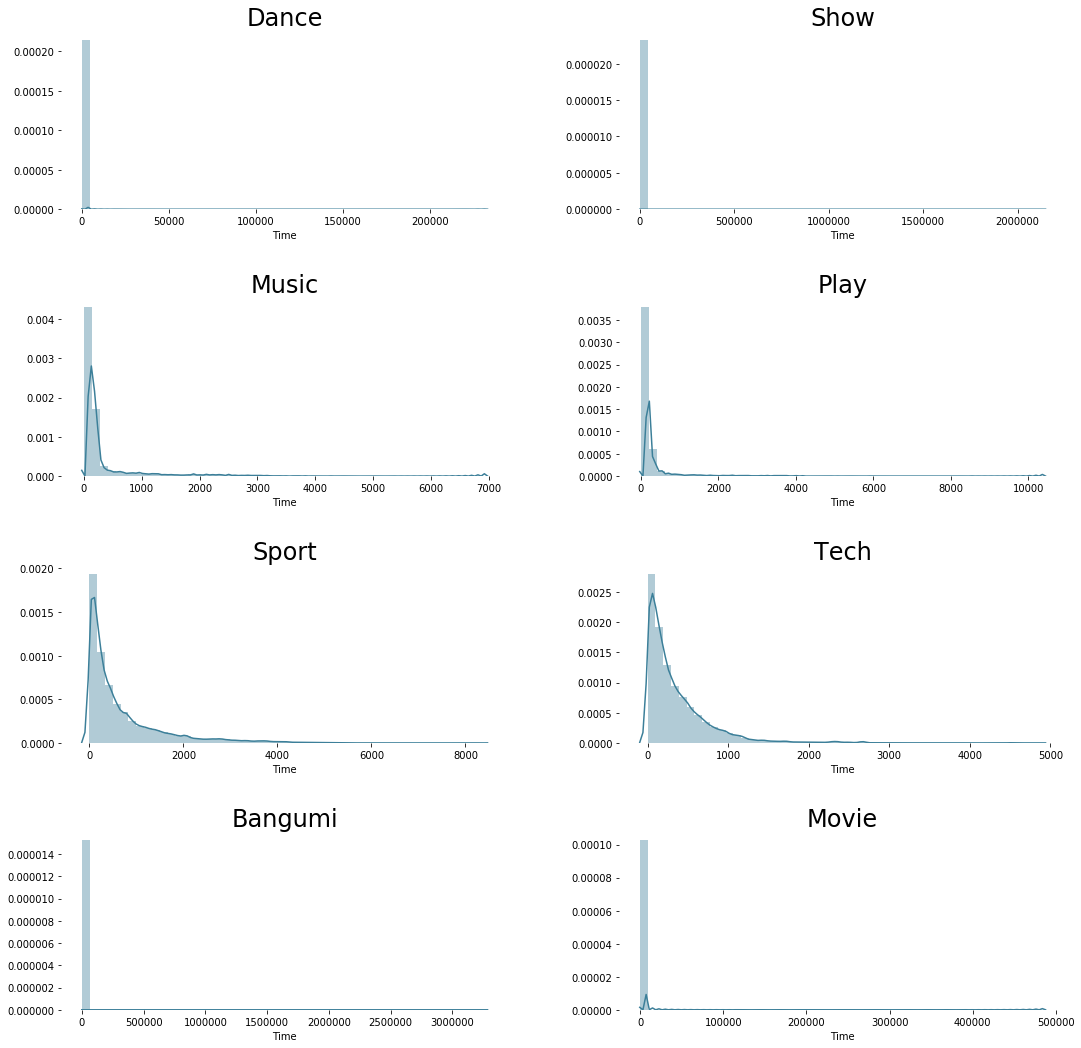

In [220]:
fig,ax= plt.subplots(figsize = (18,18))
grid = plt.GridSpec(4,2,wspace = 0.25,hspace = 0.5)
plt.subplot(grid[0,0])
sns.distplot(df_colorful[df_colorful.category == 'dance'].time, color='#3c7f99')
plt.title('Dance', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[0,1])
sns.distplot(df_colorful[df_colorful.category == 'show'].time, color='#3c7f99')
plt.title('Show', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[1,0])
sns.distplot(df_colorful[df_colorful.category == 'music'].time, color='#3c7f99')
plt.title('Music', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[1,1])
sns.distplot(df_colorful[df_colorful.category == 'play'].time, color='#3c7f99')
plt.title('Play', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[2,0])
sns.distplot(df_colorful[df_colorful.category == 'sport'].time, color='#3c7f99')
plt.title('Sport', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[2,1])
sns.distplot(df_colorful[df_colorful.category == 'tech'].time, color='#3c7f99')
plt.title('Tech', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[3,0])
sns.distplot(df_colorful[df_colorful.category == 'bangumi'].time, color='#3c7f99')
plt.title('Bangumi', fontsize=24)
plt.xlabel('Time')
plt.box(False)

plt.subplot(grid[3,1])
sns.distplot(df_colorful[df_colorful.category == 'movie'].time, color='#3c7f99')
plt.title('Movie', fontsize=24)
plt.xlabel('Time')
plt.box(False)

## Time location (colorful danmus ratio)

In [118]:
dance_colorful = df_colorful[df_colorful.category == 'dance']
show_colorful = df_colorful[df_colorful.category == 'show']
music_colorful = df_colorful[df_colorful.category == 'music']
play_colorful = df_colorful[df_colorful.category == 'play']
sport_colorful = df_colorful[df_colorful.category == 'sport']
tech_colorful = df_colorful[df_colorful.category == 'tech']
bangumi_colorful = df_colorful[df_colorful.category == 'bangumi']
movie_colorful = df_colorful[df_colorful.category == 'movie']

In [120]:
colors = ['#FF0000', '#00FFFF', '#00FF00', '#FFAA00', '#550055', '#00AA55', '#000000', '#FF0055', '#00AAFF', '#FFFF00']
colors_name = ['red','lakeblue','lightgreen','orange',
              'purple','grassgreen','black','rosered','skyblue','yellow']

In [123]:
colorful_video = pd.unique(df_colorful.video_id)
df_color = df[df.video_id.isin(colorful_video)]
unique_time = list(pd.unique(df_color.time))
per_list = []
for i in range(10,100,10):
    per_list.append(np.percentile(unique_time, i))

In [124]:
def transform(time,percentile = per_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [125]:
df_color['percentile'] = df_color.time.apply(transform)

In [127]:
df_overall_time = df_color[['video_id','percentile']]
df_overall_time['value'] = np.ones(df_color.shape[0])
df_overall_colorful = df_overall_time.groupby(['video_id','percentile']).sum().reset_index()
df_time = df_color[df_color.font_color_64 != '0xFFFFFF']
df_over_time = df_time[['video_id','percentile']]
df_over_time['value'] = np.ones(df_time.shape[0])
df_over_colorful = df_over_time.groupby(['video_id','percentile']).sum().reset_index()

In [128]:
merge_all = df_overall_colorful.merge(df_over_colorful,on = ['video_id','percentile'],how = 'left',indicator = True)
merge = merge_all.iloc[:,:-1]
merge_df = merge.fillna(0)
merge_df['colorful_ratio'] = merge_df['value_y']/merge_df['value_x']
merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
merge_df.head(9)

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,4442,1,575.0,170.0,0.295652
1,4442,2,163.0,45.0,0.276074
2,4442,3,188.0,43.0,0.228723
3,4442,4,166.0,38.0,0.228916
4,4442,5,198.0,54.0,0.272727
5,4442,6,1037.0,289.0,0.278689
6,4442,7,662.0,187.0,0.282477
7,4442,8,4.0,0.0,0.000000
8,4442,9,6.0,0.0,0.000000


In [131]:
time_location = ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%']
df_merge = merge_df[['video_id','percentile','colorful_danmus_ratio']]
df_merge_pivot = df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
4442,0.295652,0.276074,0.228723,0.228916,0.272727,0.278689,0.282477,0.0,0.0,0.0
4443,0.223837,0.328125,0.324190,0.196078,0.256024,0.230954,0.274336,0.0,0.0,0.0
4444,0.233945,0.293478,0.243129,0.311778,0.256410,0.264755,0.343284,0.0,0.0,0.0
4445,0.288136,0.243767,0.247826,0.263889,0.256071,0.234043,0.303371,0.0,0.0,0.0
4446,0.276786,0.216495,0.284916,0.207746,0.208675,0.233055,0.283784,0.0,0.0,0.0


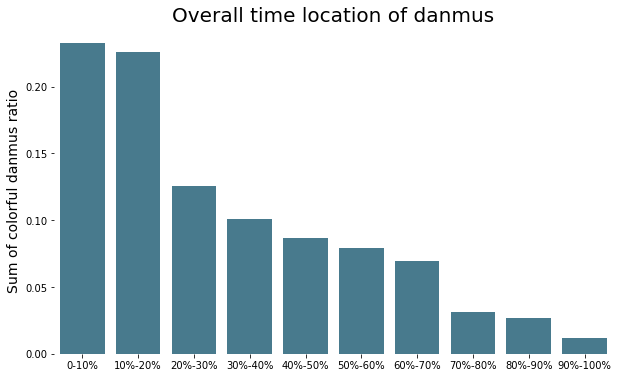

In [133]:
cum = df_merge_pivot.sum(axis = 0)
fig= plt.subplots(figsize = (10,6))
sns.barplot(x = time_location, y = cum/4409, color='#3c7f99')
plt.title('Overall time location of danmus',fontsize=20)
plt.ylabel('Sum of colorful danmus ratio',fontsize = 14)
plt.box(False)
plt.show()

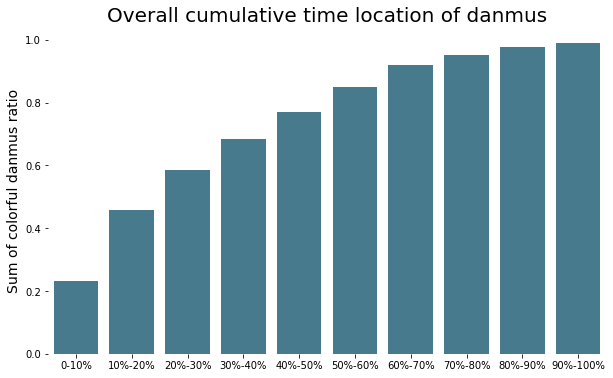

In [134]:
fig= plt.subplots(figsize = (10,6))
sns.barplot(x = time_location, y = np.cumsum(cum)/4409, color='#3c7f99')
plt.title('Overall cumulative time location of danmus',fontsize=20)
plt.ylabel('Sum of colorful danmus ratio',fontsize = 14)
plt.box(False)
plt.show()

### Genre-specific

In [135]:
dance_color = df_color[df_color.category == 'dance']
unique_dance_time = list(pd.unique(dance_color.time))
dance_list = []
for i in range(10,100,10):
    dance_list.append(np.percentile(unique_dance_time, i))

In [136]:
def transform(time,percentile = dance_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [137]:
dance_color_pd = dance_color[['video_id','time','font_color_64']]
dance_color_pd['percentile'] = dance_color_pd.time.apply(transform)
dance_all_pd = dance_color_pd[['video_id','percentile']]
dance_all_pd['value'] = np.ones(dance_color_pd.shape[0])
dance_all_df = dance_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [138]:
dance_colorful = dance_color_pd[dance_color_pd.font_color_64 !='0xFFFFFF']
dance_colorful_pd = dance_colorful[['video_id','percentile']]
dance_colorful_pd['value'] = np.ones(dance_colorful_pd.shape[0])
dance_colorful_df = dance_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [139]:
dance_merge_all = dance_all_df.merge(dance_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
dance_merge = dance_merge_all.iloc[:,:-1]
dance_merge_df = dance_merge.fillna(0)
dance_merge_df['colorful_ratio'] = dance_merge_df['value_y']/dance_merge_df['value_x']
dance_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
dance_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,176924,1,257.0,42.0,0.163424
1,176924,2,224.0,42.0,0.187500
2,176924,3,123.0,24.0,0.195122
3,176924,4,117.0,31.0,0.264957
4,176924,5,95.0,31.0,0.326316


In [140]:
dance_df_merge = dance_merge_df[['video_id','percentile','colorful_danmus_ratio']]
dance_df_merge_pivot = dance_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
dance_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
176924,0.163424,0.187500,0.195122,0.264957,0.326316,0.261905,0.290000,0.000000,0.0,0.0
204676,0.250000,0.254464,0.393103,0.336735,0.473333,0.280000,0.478261,0.000000,0.0,0.0
223999,0.160428,0.125000,0.066351,0.121212,0.123288,0.202703,0.240385,0.308271,0.0,0.0
227625,0.329545,0.294118,0.283688,0.230769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
240452,0.227723,0.409836,0.345588,0.428571,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [141]:
show_color = df_color[df_color.category == 'show']
unique_show_time = list(pd.unique(show_color.time))
show_list = []
for i in range(10,100,10):
    show_list.append(np.percentile(unique_show_time, i))

In [142]:
def transform(time,percentile = show_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [146]:
show_color_pd = show_color[['video_id','time','font_color_64']]
show_color_pd['percentile'] = show_color_pd.time.apply(transform)
show_all_pd = show_color_pd[['video_id','percentile']]
show_all_pd['value'] = np.ones(show_color_pd.shape[0])
show_all_df = show_all_pd.groupby(['video_id','percentile']).sum().reset_index()
show_colorful = show_color_pd[show_color_pd.font_color_64 !='0xFFFFFF']
show_colorful_pd = show_colorful[['video_id','percentile']]
show_colorful_pd['value'] = np.ones(show_colorful_pd.shape[0])
show_colorful_df = show_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [147]:
show_merge_all = show_all_df.merge(show_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
show_merge = show_merge_all.iloc[:,:-1]
show_merge_df = show_merge.fillna(0)
show_merge_df['colorful_ratio'] = show_merge_df['value_y']/show_merge_df['value_x']
show_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
show_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,12946984,1,271.0,44.0,0.162362
1,12946984,2,344.0,49.0,0.142442
2,12946984,3,280.0,56.0,0.200000
3,12946984,4,360.0,77.0,0.213889
4,12946984,5,236.0,54.0,0.228814


In [148]:
show_df_merge = show_merge_df[['video_id','percentile','colorful_danmus_ratio']]
show_df_merge_pivot = show_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
show_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
12946984,0.162362,0.142442,0.200000,0.213889,0.228814,0.154728,0.181230,0.105906,0.102354,0.000000
12973817,0.253086,0.269231,0.229008,0.273026,0.305085,0.304659,0.319635,0.000000,0.000000,0.000000
12976189,0.244709,0.226221,0.201954,0.222571,0.205333,0.227969,0.210843,0.000000,0.000000,0.000000
13010752,0.364486,0.069930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13016239,0.679570,0.636943,0.492537,0.763085,0.785894,0.771028,0.738614,0.751445,0.780911,0.623881


In [149]:
music_color = df_color[df_color.category == 'music']
unique_music_time = list(pd.unique(music_color.time))
music_list = []
for i in range(10,100,10):
    music_list.append(np.percentile(unique_music_time, i))

In [150]:
def transform(time,percentile = music_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [151]:
music_color_pd = music_color[['video_id','time','font_color_64']]
music_color_pd['percentile'] = music_color_pd.time.apply(transform)
music_all_pd = music_color_pd[['video_id','percentile']]
music_all_pd['value'] = np.ones(music_color_pd.shape[0])
music_all_df = music_all_pd.groupby(['video_id','percentile']).sum().reset_index()
music_colorful = music_color_pd[music_color_pd.font_color_64 !='0xFFFFFF']
music_colorful_pd = music_colorful[['video_id','percentile']]
music_colorful_pd['value'] = np.ones(music_colorful_pd.shape[0])
music_colorful_df = music_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()
music_merge_all = music_all_df.merge(music_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
music_merge = music_merge_all.iloc[:,:-1]
music_merge_df = music_merge.fillna(0)
music_merge_df['colorful_ratio'] = music_merge_df['value_y']/music_merge_df['value_x']
music_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
music_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,959854,1,70.0,6.0,0.085714
1,959854,2,75.0,18.0,0.240000
2,959854,3,84.0,32.0,0.380952
3,959854,4,81.0,13.0,0.160494
4,959854,5,138.0,43.0,0.311594


In [152]:
music_df_merge = music_merge_df[['video_id','percentile','colorful_danmus_ratio']]
music_df_merge_pivot = music_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
music_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
959854,0.085714,0.240000,0.380952,0.160494,0.311594,0.247312,0.312500,0.285714,0.0,0.0
962933,0.292553,0.346457,0.454545,0.435294,0.443182,0.407407,0.347826,0.000000,0.0,0.0
972378,0.267176,0.298246,0.375839,0.366667,0.365517,0.340426,0.469799,0.232323,0.0,0.0
972625,0.261411,0.227273,0.386076,0.455357,0.203390,0.184211,0.304878,0.000000,0.0,0.0
979006,0.127119,0.554502,0.426966,0.206897,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [153]:
play_color = df_color[df_color.category == 'play']
unique_play_time = list(pd.unique(play_color.time))
play_list = []
for i in range(10,100,10):
    play_list.append(np.percentile(unique_play_time, i))

In [154]:
def transform(time,percentile = play_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [155]:
play_color_pd = play_color[['video_id','time','font_color_64']]
play_color_pd['percentile'] = play_color_pd.time.apply(transform)
play_all_pd = play_color_pd[['video_id','percentile']]
play_all_pd['value'] = np.ones(play_color_pd.shape[0])
play_all_df = play_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [156]:
play_colorful = play_color_pd[play_color_pd.font_color_64 !='0xFFFFFF']
play_colorful_pd = play_colorful[['video_id','percentile']]
play_colorful_pd['value'] = np.ones(play_colorful_pd.shape[0])
play_colorful_df = play_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [157]:
play_merge_all = play_all_df.merge(play_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
play_merge = play_merge_all.iloc[:,:-1]
play_merge_df = play_merge.fillna(0)
play_merge_df['colorful_ratio'] = play_merge_df['value_y']/play_merge_df['value_x']
play_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
play_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,7493053,1,125.0,30.0,0.240000
1,7493053,2,105.0,22.0,0.209524
2,7493053,3,79.0,17.0,0.215190
3,7493053,4,88.0,21.0,0.238636
4,7493053,5,110.0,24.0,0.218182


In [158]:
play_df_merge = play_merge_df[['video_id','percentile','colorful_danmus_ratio']]
play_df_merge_pivot = play_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
play_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
7493053,0.240000,0.209524,0.215190,0.238636,0.218182,0.276316,0.220183,0.309524,0.000000,0.000000
7695347,0.190476,0.285714,0.320000,0.217391,0.105263,0.242424,0.208333,0.258065,0.309333,0.205224
7697167,0.417266,0.274074,0.461905,0.331126,0.350427,0.329670,0.255319,0.333333,0.000000,0.000000
7708411,0.000731,0.000000,0.125000,0.000000,0.250000,0.000000,0.222222,0.100000,0.160494,0.022727
7712097,0.318408,0.365000,0.482759,0.371429,0.386792,0.361702,0.442105,0.444444,0.000000,0.000000


In [159]:
sport_color = df_color[df_color.category == 'sport']
unique_sport_time = list(pd.unique(sport_color.time))
sport_list = []
for i in range(10,100,10):
    sport_list.append(np.percentile(unique_sport_time, i))

In [160]:
def transform(time,percentile = sport_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [161]:
sport_color_pd = sport_color[['video_id','time','font_color_64']]
sport_color_pd['percentile'] = sport_color_pd.time.apply(transform)
sport_all_pd = sport_color_pd[['video_id','percentile']]
sport_all_pd['value'] = np.ones(sport_color_pd.shape[0])
sport_all_df = sport_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [162]:
sport_colorful = sport_color_pd[sport_color_pd.font_color_64 !='0xFFFFFF']
sport_colorful_pd = sport_colorful[['video_id','percentile']]
sport_colorful_pd['value'] = np.ones(sport_colorful_pd.shape[0])
sport_colorful_df = sport_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [163]:
sport_merge_all = sport_all_df.merge(sport_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
sport_merge = sport_merge_all.iloc[:,:-1]
sport_merge_df = sport_merge.fillna(0)
sport_merge_df['colorful_ratio'] = sport_merge_df['value_y']/sport_merge_df['value_x']
sport_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
sport_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,4895554,1,298.0,19.0,0.063758
1,4895554,2,143.0,9.0,0.062937
2,4895554,3,134.0,11.0,0.082090
3,4895554,4,105.0,7.0,0.066667
4,4895554,5,335.0,42.0,0.125373


In [164]:
sport_df_merge = sport_merge_df[['video_id','percentile','colorful_danmus_ratio']]
sport_df_merge_pivot = sport_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
sport_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
4895554,0.063758,0.062937,0.082090,0.066667,0.125373,0.137149,0.137731,0.000000,0.000000,0.000000
4908986,0.082474,0.107692,0.081081,0.036585,0.064677,0.106383,0.094444,0.087879,0.082547,0.089810
4984993,0.132275,0.110749,0.143836,0.159836,0.172308,0.189189,0.143564,0.167067,0.000000,0.000000
5316930,0.162562,0.178082,0.184397,0.186869,0.183575,0.181435,0.193103,0.170564,0.157692,0.179104
5317091,0.129237,0.171053,0.134078,0.153333,0.297872,0.000000,0.000000,0.000000,0.000000,0.000000


In [165]:
tech_color = df_color[df_color.category == 'tech']
unique_tech_time = list(pd.unique(tech_color.time))
tech_list = []
for i in range(10,100,10):
    tech_list.append(np.percentile(unique_tech_time, i))

In [166]:
def transform(time,percentile = tech_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [167]:
tech_color_pd = tech_color[['video_id','time','font_color_64']]
tech_color_pd['percentile'] = tech_color_pd.time.apply(transform)
tech_all_pd = tech_color_pd[['video_id','percentile']]
tech_all_pd['value'] = np.ones(tech_color_pd.shape[0])
tech_all_df = tech_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [168]:
tech_colorful = tech_color_pd[tech_color_pd.font_color_64 !='0xFFFFFF']
tech_colorful_pd = tech_colorful[['video_id','percentile']]
tech_colorful_pd['value'] = np.ones(tech_colorful_pd.shape[0])
tech_colorful_df = tech_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [169]:
tech_merge_all = tech_all_df.merge(tech_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
tech_merge = tech_merge_all.iloc[:,:-1]
tech_merge_df = tech_merge.fillna(0)
tech_merge_df['colorful_ratio'] = tech_merge_df['value_y']/tech_merge_df['value_x']
tech_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
tech_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,19945753,1,121.0,12.0,0.099174
1,19945753,2,107.0,10.0,0.093458
2,19945753,3,123.0,8.0,0.065041
3,19945753,4,122.0,4.0,0.032787
4,19945753,5,133.0,7.0,0.052632


In [170]:
tech_df_merge = tech_merge_df[['video_id','percentile','colorful_danmus_ratio']]
tech_df_merge_pivot = tech_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
tech_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
19945753,0.099174,0.093458,0.065041,0.032787,0.052632,0.080292,0.048649,0.050633,0.027027,0.0
20015933,0.143617,0.083799,0.105590,0.149378,0.076923,0.000000,0.000000,0.000000,0.000000,0.0
20028733,0.105263,0.119403,0.195312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20033644,0.141026,0.090379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20034683,0.191919,0.064516,0.058065,0.093220,0.072289,0.043165,0.031915,0.000000,0.000000,0.0


In [171]:
bangumi_color = df_color[df_color.category == 'bangumi']
unique_bangumi_time = list(pd.unique(bangumi_color.time))
bangumi_list = []
for i in range(10,100,10):
    bangumi_list.append(np.percentile(unique_bangumi_time, i))

In [172]:
def transform(time,percentile = bangumi_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [173]:
bangumi_color_pd = bangumi_color[['video_id','time','font_color_64']]
bangumi_color_pd['percentile'] = bangumi_color_pd.time.apply(transform)
bangumi_all_pd = bangumi_color_pd[['video_id','percentile']]
bangumi_all_pd['value'] = np.ones(bangumi_color_pd.shape[0])
bangumi_all_df = bangumi_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [174]:
bangumi_colorful = bangumi_color_pd[bangumi_color_pd.font_color_64 !='0xFFFFFF']
bangumi_colorful_pd = bangumi_colorful[['video_id','percentile']]
bangumi_colorful_pd['value'] = np.ones(bangumi_colorful_pd.shape[0])
bangumi_colorful_df = bangumi_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [175]:
bangumi_merge_all = bangumi_all_df.merge(bangumi_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
bangumi_merge = bangumi_merge_all.iloc[:,:-1]
bangumi_merge_df = bangumi_merge.fillna(0)
bangumi_merge_df['colorful_ratio'] = bangumi_merge_df['value_y']/bangumi_merge_df['value_x']
bangumi_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
bangumi_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,4442,1,484.0,145.0,0.299587
1,4442,2,117.0,32.0,0.273504
2,4442,3,112.0,25.0,0.223214
3,4442,4,118.0,34.0,0.288136
4,4442,5,136.0,28.0,0.205882


In [176]:
bangumi_df_merge = bangumi_merge_df[['video_id','percentile','colorful_danmus_ratio']]
bangumi_df_merge_pivot =bangumi_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
bangumi_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
4442,0.299587,0.273504,0.223214,0.288136,0.205882,0.213592,0.310345,0.282443,0.238636,0.288447
4443,0.177340,0.327103,0.305389,0.356522,0.283262,0.190722,0.208556,0.265700,0.229706,0.236943
4444,0.169550,0.400763,0.273556,0.224176,0.301471,0.334711,0.246575,0.256198,0.254019,0.290598
4445,0.260204,0.347490,0.228916,0.232190,0.262887,0.254181,0.270916,0.260377,0.239645,0.243243
4446,0.199052,0.364162,0.188976,0.283333,0.262774,0.202020,0.230352,0.195918,0.224719,0.250000


In [177]:
movie_color = df_color[df_color.category == 'movie']
unique_movie_time = list(pd.unique(movie_color.time))
movie_list = []
for i in range(10,100,10):
    movie_list.append(np.percentile(unique_movie_time, i))

In [178]:
def transform(time,percentile = movie_list):
    if time <= percentile[0]:#np.percentile(arr, 10):
        return 1
    elif time <= percentile[1]:#np.percentile(arr, 20):
        return 2
    elif time <= percentile[2]:#np.percentile(arr, 30):
        return 3
    elif time <= percentile[3]:#np.percentile(arr, 40):
        return 4
    elif time <= percentile[4]:#np.percentile(arr, 50):
        return 5
    elif time <= percentile[5]:#np.percentile(arr, 60):
        return 6
    elif time <= percentile[6]:#np.percentile(arr, 70):
        return 7
    elif time <= percentile[7]:#np.percentile(arr, 80):
        return 8
    elif time <= percentile[8]:#np.percentile(arr, 90):
        return 9
    else:
        return 10

In [179]:
movie_color_pd = movie_color[['video_id','time','font_color_64']]
movie_color_pd['percentile'] = movie_color_pd.time.apply(transform)
movie_all_pd = movie_color_pd[['video_id','percentile']]
movie_all_pd['value'] = np.ones(movie_color_pd.shape[0])
movie_all_df = movie_all_pd.groupby(['video_id','percentile']).sum().reset_index()

In [180]:
movie_colorful = movie_color_pd[movie_color_pd.font_color_64 !='0xFFFFFF']
movie_colorful_pd = movie_colorful[['video_id','percentile']]
movie_colorful_pd['value'] = np.ones(movie_colorful_pd.shape[0])
movie_colorful_df = movie_colorful_pd.groupby(['video_id','percentile']).sum().reset_index()

In [181]:
movie_merge_all = movie_all_df.merge(movie_colorful_df,on = ['video_id','percentile'],how = 'left',indicator = True)
movie_merge = movie_merge_all.iloc[:,:-1]
movie_merge_df = movie_merge.fillna(0)
movie_merge_df['colorful_ratio'] = movie_merge_df['value_y']/movie_merge_df['value_x']
movie_merge_df.columns = ['video_id','percentile','total_danmus','colorful_danmus','colorful_danmus_ratio']
movie_merge_df.head()

,video_id,percentile,total_danmus,colorful_danmus,colorful_danmus_ratio
0,42451,1,627.0,62.0,0.098884
1,42451,2,873.0,86.0,0.098511
2,42451,3,967.0,122.0,0.126163
3,42451,4,1274.0,207.0,0.162480
4,42451,5,1600.0,259.0,0.161875


In [182]:
movie_df_merge = movie_merge_df[['video_id','percentile','colorful_danmus_ratio']]
movie_df_merge_pivot =movie_df_merge.pivot(index = 'video_id',columns = 'percentile',values = 'colorful_danmus_ratio').fillna(0)
#df_merge_pivot[df_merge_pivot.iloc[:,-1] != 0]
movie_df_merge_pivot.head()

percentile,1,2,3,4,5,6,7,8,9,10
video_id,,,,,,,,,,
42451,0.098884,0.098511,0.126163,0.162480,0.161875,0.139942,0.154989,0.187207,0.166023,0.000000
62535,0.072993,0.089783,0.064935,0.091912,0.125874,0.087278,0.088195,0.138009,0.126404,0.000000
70996,0.130019,0.168739,0.153203,0.194805,0.218121,0.183193,0.213978,0.185615,0.157339,0.169757
74010,0.221823,0.216718,0.215223,0.296899,0.361739,0.239492,0.213527,0.210117,0.188084,0.210682
84640,0.169406,0.156288,0.146707,0.204762,0.139300,0.155227,0.171088,0.166417,0.139208,0.000000


In [183]:
dance_cum = dance_df_merge_pivot.sum(axis = 0)
show_cum = show_df_merge_pivot.sum(axis = 0)
music_cum = music_df_merge_pivot.sum(axis = 0)
play_cum = play_df_merge_pivot.sum(axis = 0)
sport_cum = sport_df_merge_pivot.sum(axis = 0)
tech_cum = tech_df_merge_pivot.sum(axis = 0)
bangumi_cum = bangumi_df_merge_pivot.sum(axis = 0)
movie_cum = movie_df_merge_pivot.sum(axis = 0)

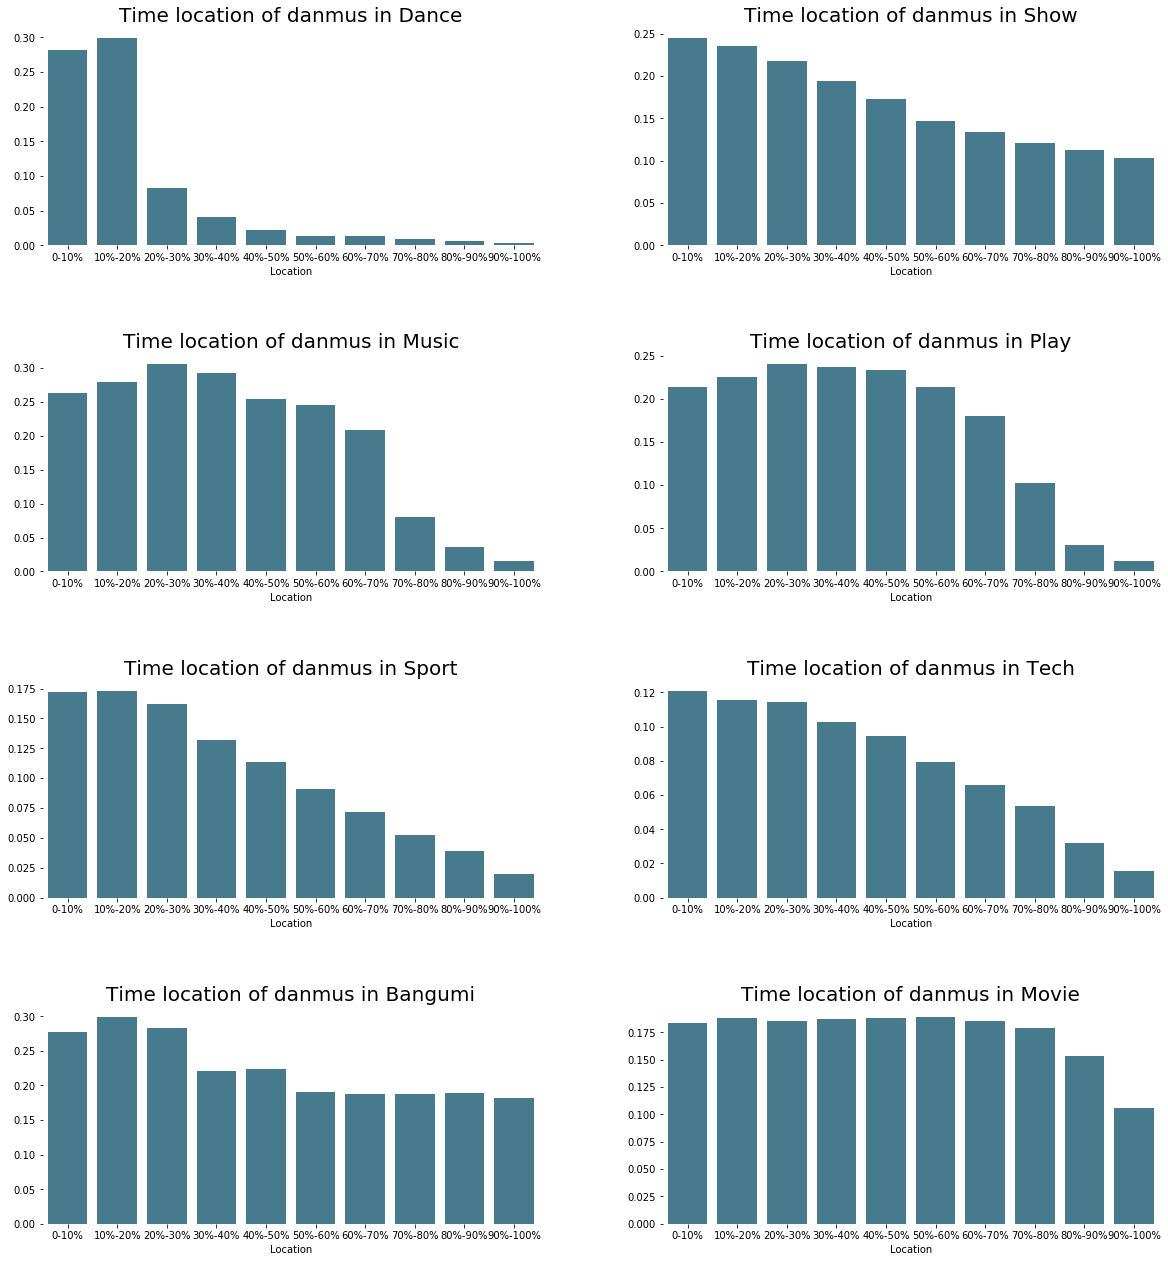

In [308]:
fig,ax= plt.subplots(figsize = (20,22))
grid = plt.GridSpec(4,2,wspace = 0.25,hspace = 0.5)
plt.subplot(grid[0,0])
sns.barplot(x = time_location, y = dance_cum/589, color='#3c7f99')
plt.title('Time location of danmus in Dance',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[0,1])
sns.barplot(x = time_location, y = show_cum/523, color='#3c7f99')
plt.title('Time location of danmus in Show',fontsize=20)
plt.xlabel('Location')
plt.box(False)


plt.subplot(grid[1,0])
sns.barplot(x = time_location, y = music_cum/564, color='#3c7f99')
plt.title('Time location of danmus in Music',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[1,1])
sns.barplot(x = time_location, y = play_cum/582, color='#3c7f99')
plt.title('Time location of danmus in Play',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[2,0])
sns.barplot(x = time_location, y = sport_cum/549, color='#3c7f99')
plt.title('Time location of danmus in Sport',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[2,1])
sns.barplot(x = time_location, y = tech_cum/590, color='#3c7f99')
plt.title('Time location of danmus in Tech',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[3,0])
sns.barplot(x = time_location, y = bangumi_cum/786, color='#3c7f99')
plt.title('Time location of danmus in Bangumi',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[3,1])
sns.barplot(x = time_location, y = movie_cum/226, color='#3c7f99')
plt.title('Time location of danmus in Movie',fontsize=20)
plt.xlabel('Location')
plt.box(False)

In [315]:
np.cumsum(dance_cum)[10]

454.6006182914663

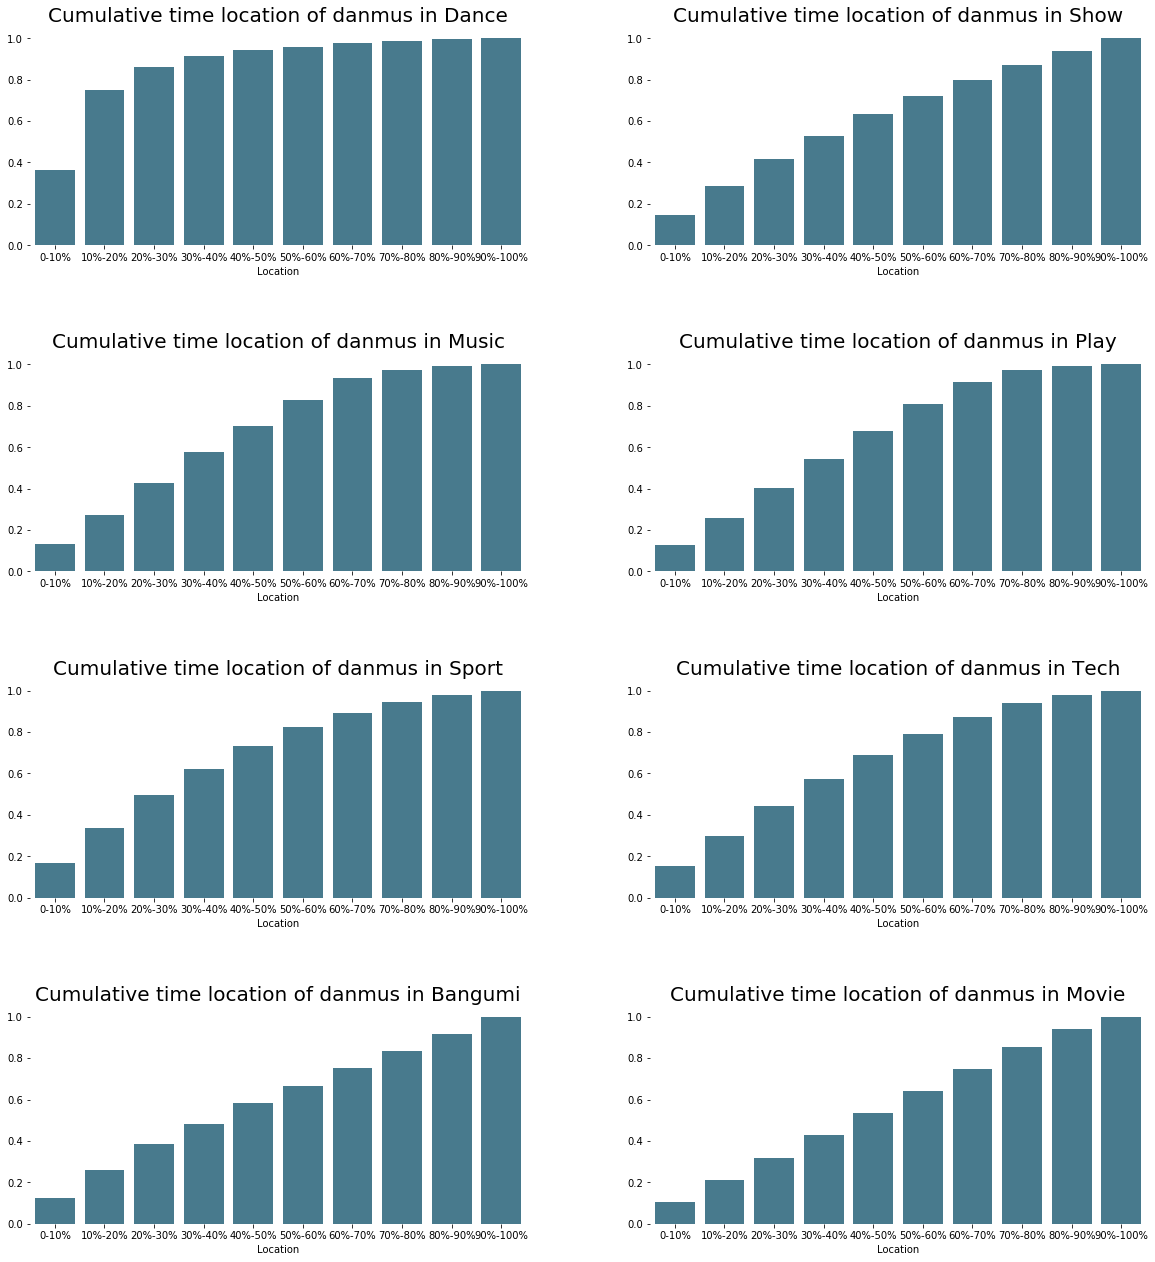

In [317]:
fig,ax= plt.subplots(figsize = (20,22))
grid = plt.GridSpec(4,2,wspace = 0.25,hspace = 0.5)
plt.subplot(grid[0,0])
sns.barplot(x = time_location, y = np.cumsum(dance_cum)/np.cumsum(dance_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Dance',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[0,1])
sns.barplot(x = time_location, y = np.cumsum(show_cum)/np.cumsum(show_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Show',fontsize=20)
plt.xlabel('Location')
plt.box(False)


plt.subplot(grid[1,0])
sns.barplot(x = time_location, y = np.cumsum(music_cum)/np.cumsum(music_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Music',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[1,1])
sns.barplot(x = time_location, y = np.cumsum(play_cum)/np.cumsum(play_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Play',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[2,0])
sns.barplot(x = time_location, y = np.cumsum(sport_cum)/np.cumsum(sport_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Sport',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[2,1])
sns.barplot(x = time_location, y = np.cumsum(tech_cum)/np.cumsum(tech_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Tech',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[3,0])
sns.barplot(x = time_location, y = np.cumsum(bangumi_cum)/np.cumsum(bangumi_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Bangumi',fontsize=20)
plt.xlabel('Location')
plt.box(False)

plt.subplot(grid[3,1])
sns.barplot(x = time_location, y = np.cumsum(movie_cum)/np.cumsum(movie_cum)[10], color='#3c7f99')
plt.title('Cumulative time location of danmus in Movie',fontsize=20)
plt.xlabel('Location')
plt.box(False)